## Combined Notebook

The code below includes:

* Data investigation
* Data cleaning (scaling, dropping features etc)
* Assessing three imputation methods
* Developing and evaluating Models (three methods: normal data, oversampling and undersampling)
* Use some Models to test on the validation set and their respective Kaggle scores

In [369]:
## Import the necessary libraries:

import sys
import os
import matplotlib
import missingno
import pandas
import pandas as pd
import numpy as np
import random

## Import necessary packages:
import pandas
import pandas as pd

## plots stuff:
import matplotlib.pyplot as plt
import matplotlib.pyplot as ply
import seaborn as sns

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

## Min/Max:
from sklearn.preprocessing import MinMaxScaler

## Scaler:
from sklearn.preprocessing import RobustScaler

## Oversampling: 
from imblearn.over_sampling import SMOTE

## To plot TSNE :
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

## Models:
from sklearn.metrics import precision_recall_curve, auc

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import GridSearchCV


-------------------------------------------------------------------------------------------------------

## Exploratory Analysis:
#### Investigate the level of imbalnce in Class column:

In [370]:
## Read in the data (we read in the same data set in later again but under a different name)
train_exp = pandas.read_csv("C:/Users/Julia/OneDrive/Documents/Julias_stuff/University_stuff/St_Andrews/Semester_2/ID5059_Knowlegde_Disc_and_Datamining/Jupyter/Coursework2/Coursework2_stuff/train.csv")     
test_exp = pandas.read_csv("C:/Users/Julia/OneDrive/Documents/Julias_stuff/University_stuff/St_Andrews/Semester_2/ID5059_Knowlegde_Disc_and_Datamining/Jupyter/Coursework2/Coursework2_stuff/test.csv")         

## Check for dupes (want to remove if present)
dups = train_exp.duplicated().sum()
print(dups)
train_exp= train_exp.drop_duplicates()

0


In [371]:
## view the data set, what does it look like, etc:

train_exp

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,0.108782,-1.070243,-0.234910,-1.099360,0.502467,0.169318,0.065688,-0.306957,-0.323800,0.103348,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,0.908773,0.836798,-0.056580,-0.120990,-0.144028,-0.039582,1.653057,-0.253599,-0.814354,0.716784,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,-0.818383,-0.376512,-0.226546,-0.552869,-0.886466,-0.180890,0.230286,0.590579,-0.321590,-0.433959,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,-0.007527,0.637441,0.676960,-1.504823,0.554039,-0.824356,-0.527267,-0.095838,-0.312519,0.642659,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,-0.097495,1.338869,1.391399,-0.128167,-0.081836,0.100548,-0.338937,0.090864,-0.423645,-0.731939,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219124,219124,120580.0,1.891079,-1.272908,-3.783908,-1.388939,2.012789,2.666080,0.151740,0.401934,-1.102824,0.858158,-0.280639,0.007976,-0.124950,0.914374,-0.073169,-2.309929,-0.041423,1.190526,-0.281848,-0.195703,-0.181369,-0.456538,-0.069571,0.756765,0.244479,-0.147566,-0.054725,-0.044588,198.65,0
219125,219125,120580.0,0.139724,0.948649,-2.913655,-2.184829,1.883716,-1.056824,1.725624,0.018089,-0.823494,-0.257933,-0.457534,0.516146,-0.071240,1.310799,-1.892909,-0.318780,-0.917395,0.098397,-0.195558,-0.116538,0.491469,1.478823,-0.085398,-0.091409,-1.053488,0.467570,0.358918,0.294735,24.00,0
219126,219126,120580.0,2.058343,-0.038993,-1.928553,0.330117,0.270127,-0.735664,-0.173878,0.144823,0.849289,-0.136498,0.179926,-1.769641,-3.937694,0.031346,0.028100,0.883566,0.391801,1.007789,0.303376,-0.384830,-0.306640,-0.965783,0.307799,-0.021434,-0.343989,0.181065,-0.098387,-0.044064,1.79,0
219127,219127,120580.0,2.079227,-2.162389,-1.785833,-2.804889,0.552845,4.038013,-2.155900,1.023785,-0.865242,1.536193,-0.058879,-0.885949,-0.254718,-0.425730,0.665556,-0.336634,0.301966,0.391249,0.037770,-0.190984,0.109909,0.590401,0.286621,0.675660,-0.510736,-0.090044,0.056749,-0.017126,88.00,0


-------------------------------------------------------------------------------------------------------

## Initial Comments:

- The first thing to understand about this data before performing any analysis is that the majority of the features, V1-V28, were obtained by PCA transformation - and so we lack material context around what each one represents. This makes things trickier, as we are solely relying on analysis over any human intuition. The upside here is that these features are already scaled

- We want to build models associated with predicting class - 0 for genuine or 1 for fraudulent - so we will mostly consider correlations with this variable when doing any analysis, but first we need to inspect this column & its distribution. 

- __Time__ here refers to the number of seconds between some arbitrary 'first' transaction and the given entry - when it happened - rather than anything to do with the time to complete a given transaction 

In [372]:
## Stats of the data features (its columns)

train_exp.describe()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000
mean,109564.000000,62377.415376,0.096008,0.048345,0.592102,0.069273,-0.161555,0.133688,-0.128224,0.149534,-0.048337,-0.039758,0.153632,-0.061038,0.014330,0.067649,0.108643,0.013650,0.036815,-0.033927,-0.008302,0.009708,-0.031064,-0.050852,-0.050531,-0.002992,0.124005,0.009881,0.014034,0.017313,66.359803,0.002140
std,63257.237906,25620.348569,1.395425,1.159805,1.132884,1.253125,1.069530,1.202411,0.817207,0.716212,1.054143,0.821889,0.976946,0.998470,1.039145,0.801335,0.891613,0.786654,0.691709,0.784454,0.739928,0.439521,0.422777,0.597812,0.318175,0.593100,0.406741,0.473867,0.233355,0.164859,150.795017,0.046214
min,0.000000,0.000000,-29.807725,-44.247914,-19.722872,-5.263650,-37.591259,-25.659750,-31.179799,-28.903442,-8.756951,-22.092656,-4.190145,-16.180165,-4.373778,-15.585021,-4.155728,-11.778839,-20.756768,-7.456060,-4.281628,-18.679066,-14.689621,-8.748979,-11.958588,-2.836285,-3.958591,-1.858672,-9.234767,-4.551680,0.000000,0.000000
25%,54782.000000,47933.000000,-0.846135,-0.573728,-0.027154,-0.769256,-0.847346,-0.631835,-0.646730,-0.095948,-0.711444,-0.499563,-0.576969,-0.476890,-0.671601,-0.329905,-0.461596,-0.461077,-0.406675,-0.496990,-0.463035,-0.167927,-0.190418,-0.473099,-0.174478,-0.332540,-0.126080,-0.318330,-0.050983,-0.009512,5.990000,0.000000
50%,109564.000000,63189.000000,0.385913,0.046937,0.735895,0.064856,-0.229929,-0.087778,-0.098970,0.111219,-0.131323,-0.106034,0.090545,0.087649,-0.016837,0.049266,0.178975,0.054550,-0.013949,-0.039451,-0.002935,-0.037702,-0.042858,-0.032856,-0.063307,0.038708,0.145934,-0.086388,0.015905,0.022163,21.900000,0.000000
75%,164346.000000,77519.000000,1.190661,0.814145,1.306110,0.919353,0.356856,0.482388,0.385567,0.390976,0.583715,0.403967,0.917392,0.608480,0.695547,0.460837,0.791255,0.531777,0.410978,0.446448,0.455718,0.126750,0.109187,0.354910,0.060221,0.394566,0.402926,0.253869,0.076814,0.066987,68.930000,0.000000
max,219128.000000,120580.000000,2.430494,16.068473,6.145578,12.547997,34.581260,16.233967,39.824099,18.270586,13.423914,15.878405,9.417789,5.406614,5.976265,6.078453,4.693323,5.834992,8.845303,4.847887,4.090974,15.407839,22.062945,6.163541,12.734391,4.572739,3.111624,3.402344,13.123618,23.263746,7475.000000,1.000000


* Drop ID column as it just uniquely specifies each entry (later we separate it out and then put it back in since Kaggle requires this for submission) 

In [373]:
## drop the id column in both test and training data:

train_exp.drop(columns=['id'],inplace=True)
test_exp.drop(columns=['id'],inplace=True)

In [374]:
## count the total number of missing or null values
train_exp.isnull().sum().sum()

## = 0, no missing values present! (as stated on the Kaggle site)

0

* What is the expected amount of money for fraudulent and non-fraudulent transactions? 

In [375]:
## Extract the entries where class = 1 (fraud. cases)

fraud = train_exp[train_exp['Class']==1]
fraud['Amount'].mean()

108.39100213219615

In [376]:
## Extract the entries where class = 0 (normal, non-fraud. cases)

authentic = train_exp[train_exp['Class']==0]
authentic['Amount'].mean()

66.26965063120608

In [377]:
## What about the class imbalance noted on the Kaggle site?:

unique_value_count = train_exp['Class'].value_counts()
print("Number of occurrences of each unique value in the 'Class' feature:")
print(unique_value_count)

## severe imbalance

Number of occurrences of each unique value in the 'Class' feature:
0    218660
1       469
Name: Class, dtype: int64


#### From this, we see:
* Each fraudulent transaction is costing the client around 108 USD, useful to note in report 
* Over 50 USD above the average amongst non-fraudulent transactions which is to be expected <br>
<br>

#### How to deal with the class inbalance?
Clearly the **number of genuine transactions vastly outnumbers those which are fraudulent** - we want to take a sample of these values to better distribute data for our models later. <br>

We could over-sample the fraudulent cases, but given the scale of the imbalance, let us attempt under-sampling: would be more appropriate such not to invent too much data to test on.

In [378]:
## Sample 469 observations RANDOMLY from the non-fraud. data (469 is total observations present for fraud.)

authentic_sample = authentic.sample(n=469, random_state=314)
authentic_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
144696,72847.0,1.161956,-0.068773,-1.590793,-0.479912,2.174889,3.028363,-0.001805,0.646750,-0.357801,-0.137549,0.010785,0.113364,-0.012424,0.674724,0.959758,0.471409,-0.896529,-0.180872,-0.053268,0.181766,-0.310064,-1.490518,-0.020839,0.936597,0.449977,-0.675068,-0.067513,0.030947,96.00,0
165776,77935.0,-1.163968,-1.368834,1.842226,-1.061150,-0.064233,-0.127965,-0.513929,-0.305039,-2.292226,1.664462,1.836983,-0.276658,0.823354,-0.934126,0.597039,-1.328930,1.040816,-0.867364,0.389845,-0.362818,0.113515,0.933405,0.672628,0.147599,-0.484479,-0.056767,-0.098985,-0.086957,20.00,0
189220,84515.0,0.954024,-0.174392,0.672818,1.393767,-0.322846,0.585925,-0.162848,0.331490,0.442324,-0.129295,1.272427,1.569099,-0.090036,-0.003750,-1.068606,-0.830487,0.347580,-0.722259,-0.171647,-0.078693,-0.012634,0.183445,-0.065662,0.041633,0.506701,-0.315756,0.054048,0.014929,65.83,0
148341,73575.0,1.222529,-1.746127,0.453627,-1.035764,0.947193,-1.902176,-0.280166,-0.934172,-2.681101,1.836305,-0.157578,-0.878794,-0.430950,0.304829,0.551899,-1.180859,0.569170,-0.023513,0.351400,-0.149948,0.061768,0.357914,-0.080169,0.412521,-0.351448,-0.081849,-0.082780,-0.229538,12.00,0
62242,50812.0,-1.143747,0.817163,1.203777,1.331515,1.702669,4.879799,-1.227801,1.252450,0.061940,-1.447044,-1.335829,0.553519,1.453836,-1.869137,-0.492490,0.555067,0.749187,0.540499,0.336899,0.407046,0.131288,0.569019,-0.247775,0.981055,0.395558,-0.034743,0.281778,0.090105,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68555,52225.0,0.683501,-1.549802,1.053864,0.137927,-1.823347,0.004068,-0.764407,0.032625,-0.351441,0.462779,-0.099088,0.564456,0.894668,-0.451359,0.743184,-1.403026,0.221729,0.935407,-1.554566,0.058544,-0.086828,-0.205515,-0.094498,0.435894,-0.093109,0.631012,-0.009359,0.078285,281.20,0
74678,53713.0,1.334438,-0.797927,0.165512,-1.022079,-0.734291,0.128457,-0.872476,0.111217,-0.773737,0.796636,0.363550,-0.506979,-0.265799,0.097164,0.392616,1.829645,-0.435252,-0.210067,1.025124,0.169390,0.251248,0.505734,-0.264751,-0.828984,0.536679,-0.083037,-0.004848,0.003864,52.00,0
218094,120113.0,0.462917,0.037693,-0.292456,-1.836306,0.104965,-0.900208,0.771848,-0.263514,-1.490069,0.455949,0.781335,0.140981,0.823805,-0.006267,-0.873259,1.039583,-0.227881,-1.038099,0.927098,0.146499,0.534343,1.545582,-0.066806,-0.276869,-0.295534,-0.147824,0.046225,0.041469,49.90,0
146846,73295.0,1.441717,-1.276160,0.943288,-1.406816,-1.897566,-0.157021,-1.545900,0.221823,-1.453598,1.588988,1.169989,-1.164744,-1.292851,-0.116745,0.517813,-0.117826,0.482929,0.702827,-0.418979,-0.481769,-0.039735,0.231538,0.061329,0.204529,0.206539,-0.109412,0.057768,0.010506,1.00,0


In [379]:
## Here we sampled the overrepresented class

authentic_sample['Class'].value_counts()

0    469
Name: Class, dtype: int64

* Using our new sampled data, we can analyse fraudulent and authentic entries side by side

In [380]:
## Now combine - now have equal observations of fraud and non-fradulent observation points

train_exp2=pd.concat([authentic_sample,fraud],axis=0)
train_exp2.reset_index(inplace=True,drop=True)

In [381]:
## Note that we have 2*469 rows

train_exp2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,72847.0,1.161956,-0.068773,-1.590793,-0.479912,2.174889,3.028363,-0.001805,0.646750,-0.357801,-0.137549,0.010785,0.113364,-0.012424,0.674724,0.959758,0.471409,-0.896529,-0.180872,-0.053268,0.181766,-0.310064,-1.490518,-0.020839,0.936597,0.449977,-0.675068,-0.067513,0.030947,96.00,0
1,77935.0,-1.163968,-1.368834,1.842226,-1.061150,-0.064233,-0.127965,-0.513929,-0.305039,-2.292226,1.664462,1.836983,-0.276658,0.823354,-0.934126,0.597039,-1.328930,1.040816,-0.867364,0.389845,-0.362818,0.113515,0.933405,0.672628,0.147599,-0.484479,-0.056767,-0.098985,-0.086957,20.00,0
2,84515.0,0.954024,-0.174392,0.672818,1.393767,-0.322846,0.585925,-0.162848,0.331490,0.442324,-0.129295,1.272427,1.569099,-0.090036,-0.003750,-1.068606,-0.830487,0.347580,-0.722259,-0.171647,-0.078693,-0.012634,0.183445,-0.065662,0.041633,0.506701,-0.315756,0.054048,0.014929,65.83,0
3,73575.0,1.222529,-1.746127,0.453627,-1.035764,0.947193,-1.902176,-0.280166,-0.934172,-2.681101,1.836305,-0.157578,-0.878794,-0.430950,0.304829,0.551899,-1.180859,0.569170,-0.023513,0.351400,-0.149948,0.061768,0.357914,-0.080169,0.412521,-0.351448,-0.081849,-0.082780,-0.229538,12.00,0
4,50812.0,-1.143747,0.817163,1.203777,1.331515,1.702669,4.879799,-1.227801,1.252450,0.061940,-1.447044,-1.335829,0.553519,1.453836,-1.869137,-0.492490,0.555067,0.749187,0.540499,0.336899,0.407046,0.131288,0.569019,-0.247775,0.981055,0.395558,-0.034743,0.281778,0.090105,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,120164.0,2.169813,-0.045807,-2.079652,0.207907,0.722241,-0.966274,0.564011,-0.381757,0.403626,0.264935,-1.778153,-0.843704,-1.463868,0.839073,0.037256,-0.294828,-0.404518,-0.038491,0.420116,-0.286788,0.054715,0.235221,-0.041338,0.084528,0.363729,0.749486,-0.136626,-0.082399,6.99,1
934,120185.0,-11.419870,-39.517039,-15.773813,3.756988,-1.482355,-3.490795,-3.917593,0.865307,-3.497517,-4.095648,-2.596490,5.406614,-0.698949,-1.017939,2.382818,5.834992,-1.814085,-0.487576,-3.658399,8.387595,1.818999,0.936693,-0.072615,-0.664149,-0.494026,0.867453,-2.758080,0.185558,498.25,1
935,120188.0,1.708900,-1.003900,-1.531147,-0.173086,-0.430068,-0.367895,-0.073634,-0.231775,-0.067886,0.501141,-1.559948,0.092857,0.098688,0.051226,-0.474728,-2.303425,0.063361,1.073029,0.123317,-0.227253,-0.099366,0.061036,-0.078629,0.009812,0.057939,-0.466157,0.049888,0.001680,229.99,1
936,120550.0,-1.330035,1.912497,0.058653,4.098485,0.555525,1.281339,-0.332319,1.016770,-1.751660,1.669879,-2.206718,-0.959271,-0.226580,0.769098,0.596934,0.376860,0.246728,0.075046,1.193329,0.171426,-0.380175,-1.235965,0.287937,-0.391235,-0.871630,0.080706,0.179565,-0.092588,20.00,1


-------------------------------------------------------------------------------------------------------

### Times of Transaction - Authentic vs Fraudulent 

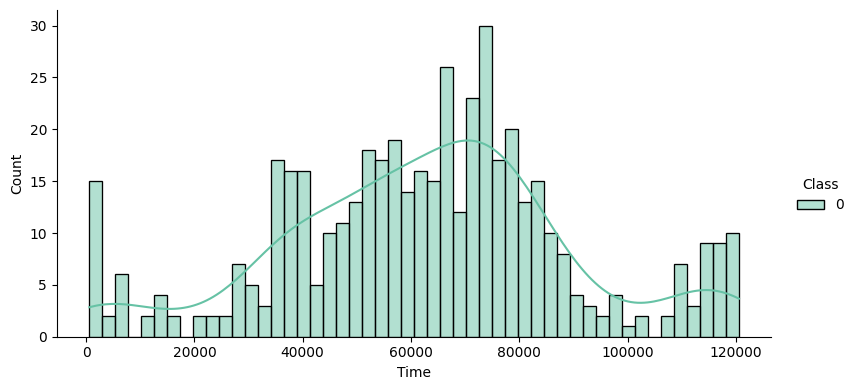

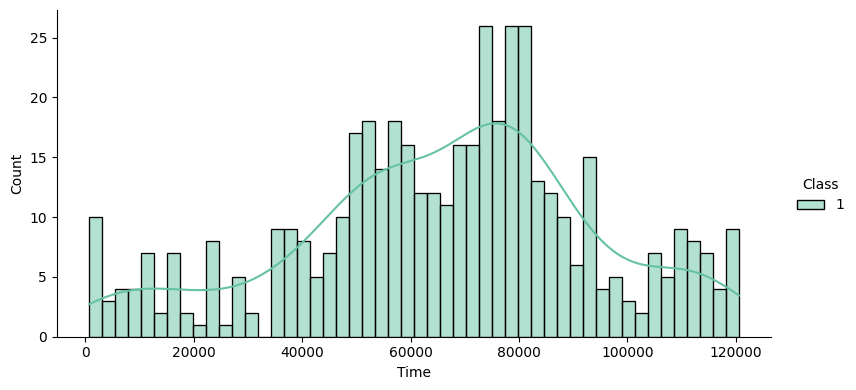

In [382]:
## transaction times for the non-fraudulent transactions vs those that are fraudulent

sns.displot(data=authentic_sample, x='Time', hue='Class', kde=True, bins=50, height=4, aspect=2)
sns.displot(data=fraud,x='Time', hue='Class', kde=True, bins=50, height=4, aspect=2)


## Non-fraud cases around late after noon
## Frauf cases mostly around that time as well

#### Observe:
* fraud. cases occur around times of peak non-fraud. transactions
* Non-fraud cases around late afternoon (before 16:00)
* Fraud cases mostly around that time as well

-------------------------------------------------------------------------------------------------------

## Data preperation

-------------------------------------------------------------------------------------------------------

### Scaling Time & Amount

Now we have a sense of the average value of transactions and the times where they took place, we can happily scale for testing 

In [383]:
# Convert 'Amount' column to **NumPy array** with a single column
amount_array = train_exp2['Amount'].to_numpy().reshape(-1, 1)
amount_array_test = test_exp['Amount'].to_numpy().reshape(-1, 1)

# Create a new RobustScaler object and fit it to the 'Amount' data
scaler = RobustScaler().fit(amount_array)
scaler_test = RobustScaler().fit(amount_array_test)

# Transform the 'Amount' data using the fitted scaler and assign the scaled data to a new column
train_exp2['Amount'] = scaler.transform(amount_array)
test_exp['Amount'] = scaler_test.transform(amount_array_test)

# The resulting 'Amount' column in train_new will be robustly scaled meaning it will be centered around the median and         
# its scale will be robust to outliers in the data. This preprocessing step can help improve the performance of
# machine learning models that use the 'Amount' feature as input.
## See this by plotting train_new['Amount'] vs train['Amount']


In [384]:
## Now do this for the time feature:

# create a MinMaxScaler object
scaler_train = MinMaxScaler()
scaler_test = MinMaxScaler()

# fit the scaler to the 'Time' column
scaler_train.fit(train_exp2[['Time']])
scaler_test.fit(test_exp[['Time']])

# transform the 'Time' column using the fitted scaler and assign the scaled data to a new column
train_exp2['Time'] = scaler_train.transform(train_exp2[['Time']])
test_exp['Time'] = scaler_test.transform(test_exp[['Time']])

## Check time lies between 0 and 1: train_new

In [385]:
## View data set:

train_exp2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.602157,1.161956,-0.068773,-1.590793,-0.479912,2.174889,3.028363,-0.001805,0.646750,-0.357801,-0.137549,0.010785,0.113364,-0.012424,0.674724,0.959758,0.471409,-0.896529,-0.180872,-0.053268,0.181766,-0.310064,-1.490518,-0.020839,0.936597,0.449977,-0.675068,-0.067513,0.030947,1.394142,0
1,0.644571,-1.163968,-1.368834,1.842226,-1.061150,-0.064233,-0.127965,-0.513929,-0.305039,-2.292226,1.664462,1.836983,-0.276658,0.823354,-0.934126,0.597039,-1.328930,1.040816,-0.867364,0.389845,-0.362818,0.113515,0.933405,0.672628,0.147599,-0.484479,-0.056767,-0.098985,-0.086957,0.076870,0
2,0.699421,0.954024,-0.174392,0.672818,1.393767,-0.322846,0.585925,-0.162848,0.331490,0.442324,-0.129295,1.272427,1.569099,-0.090036,-0.003750,-1.068606,-0.830487,0.347580,-0.722259,-0.171647,-0.078693,-0.012634,0.183445,-0.065662,0.041633,0.506701,-0.315756,0.054048,0.014929,0.871219,0
3,0.608226,1.222529,-1.746127,0.453627,-1.035764,0.947193,-1.902176,-0.280166,-0.934172,-2.681101,1.836305,-0.157578,-0.878794,-0.430950,0.304829,0.551899,-1.180859,0.569170,-0.023513,0.351400,-0.149948,0.061768,0.357914,-0.080169,0.412521,-0.351448,-0.081849,-0.082780,-0.229538,-0.061790,0
4,0.418474,-1.143747,0.817163,1.203777,1.331515,1.702669,4.879799,-1.227801,1.252450,0.061940,-1.447044,-1.335829,0.553519,1.453836,-1.869137,-0.492490,0.555067,0.749187,0.540499,0.336899,0.407046,0.131288,0.569019,-0.247775,0.981055,0.395558,-0.034743,0.281778,0.090105,-0.252448,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,0.996591,2.169813,-0.045807,-2.079652,0.207907,0.722241,-0.966274,0.564011,-0.381757,0.403626,0.264935,-1.778153,-0.843704,-1.463868,0.839073,0.037256,-0.294828,-0.404518,-0.038491,0.420116,-0.286788,0.054715,0.235221,-0.041338,0.084528,0.363729,0.749486,-0.136626,-0.082399,-0.148626,1
934,0.996766,-11.419870,-39.517039,-15.773813,3.756988,-1.482355,-3.490795,-3.917593,0.865307,-3.497517,-4.095648,-2.596490,5.406614,-0.698949,-1.017939,2.382818,5.834992,-1.814085,-0.487576,-3.658399,8.387595,1.818999,0.936693,-0.072615,-0.664149,-0.494026,0.867453,-2.758080,0.185558,8.366150,1
935,0.996791,1.708900,-1.003900,-1.531147,-0.173086,-0.430068,-0.367895,-0.073634,-0.231775,-0.067886,0.501141,-1.559948,0.092857,0.098688,0.051226,-0.474728,-2.303425,0.063361,1.073029,0.123317,-0.227253,-0.099366,0.061036,-0.078629,0.009812,0.057939,-0.466157,0.049888,0.001680,3.716527,1
936,0.999808,-1.330035,1.912497,0.058653,4.098485,0.555525,1.281339,-0.332319,1.016770,-1.751660,1.669879,-2.206718,-0.959271,-0.226580,0.769098,0.596934,0.376860,0.246728,0.075046,1.193329,0.171426,-0.380175,-1.235965,0.287937,-0.391235,-0.871630,0.080706,0.179565,-0.092588,0.076870,1


In [386]:
sns.set_palette('Set2')

-------------------------------------------------------------------------------------------------------

## Demonstrating the Importance of Under-sampling
Let's pull up a heatmap of the correlations before and after undersampling to better illustrate its necessity here

-------------------------------------------------------------------------------------------------------

#### Before...

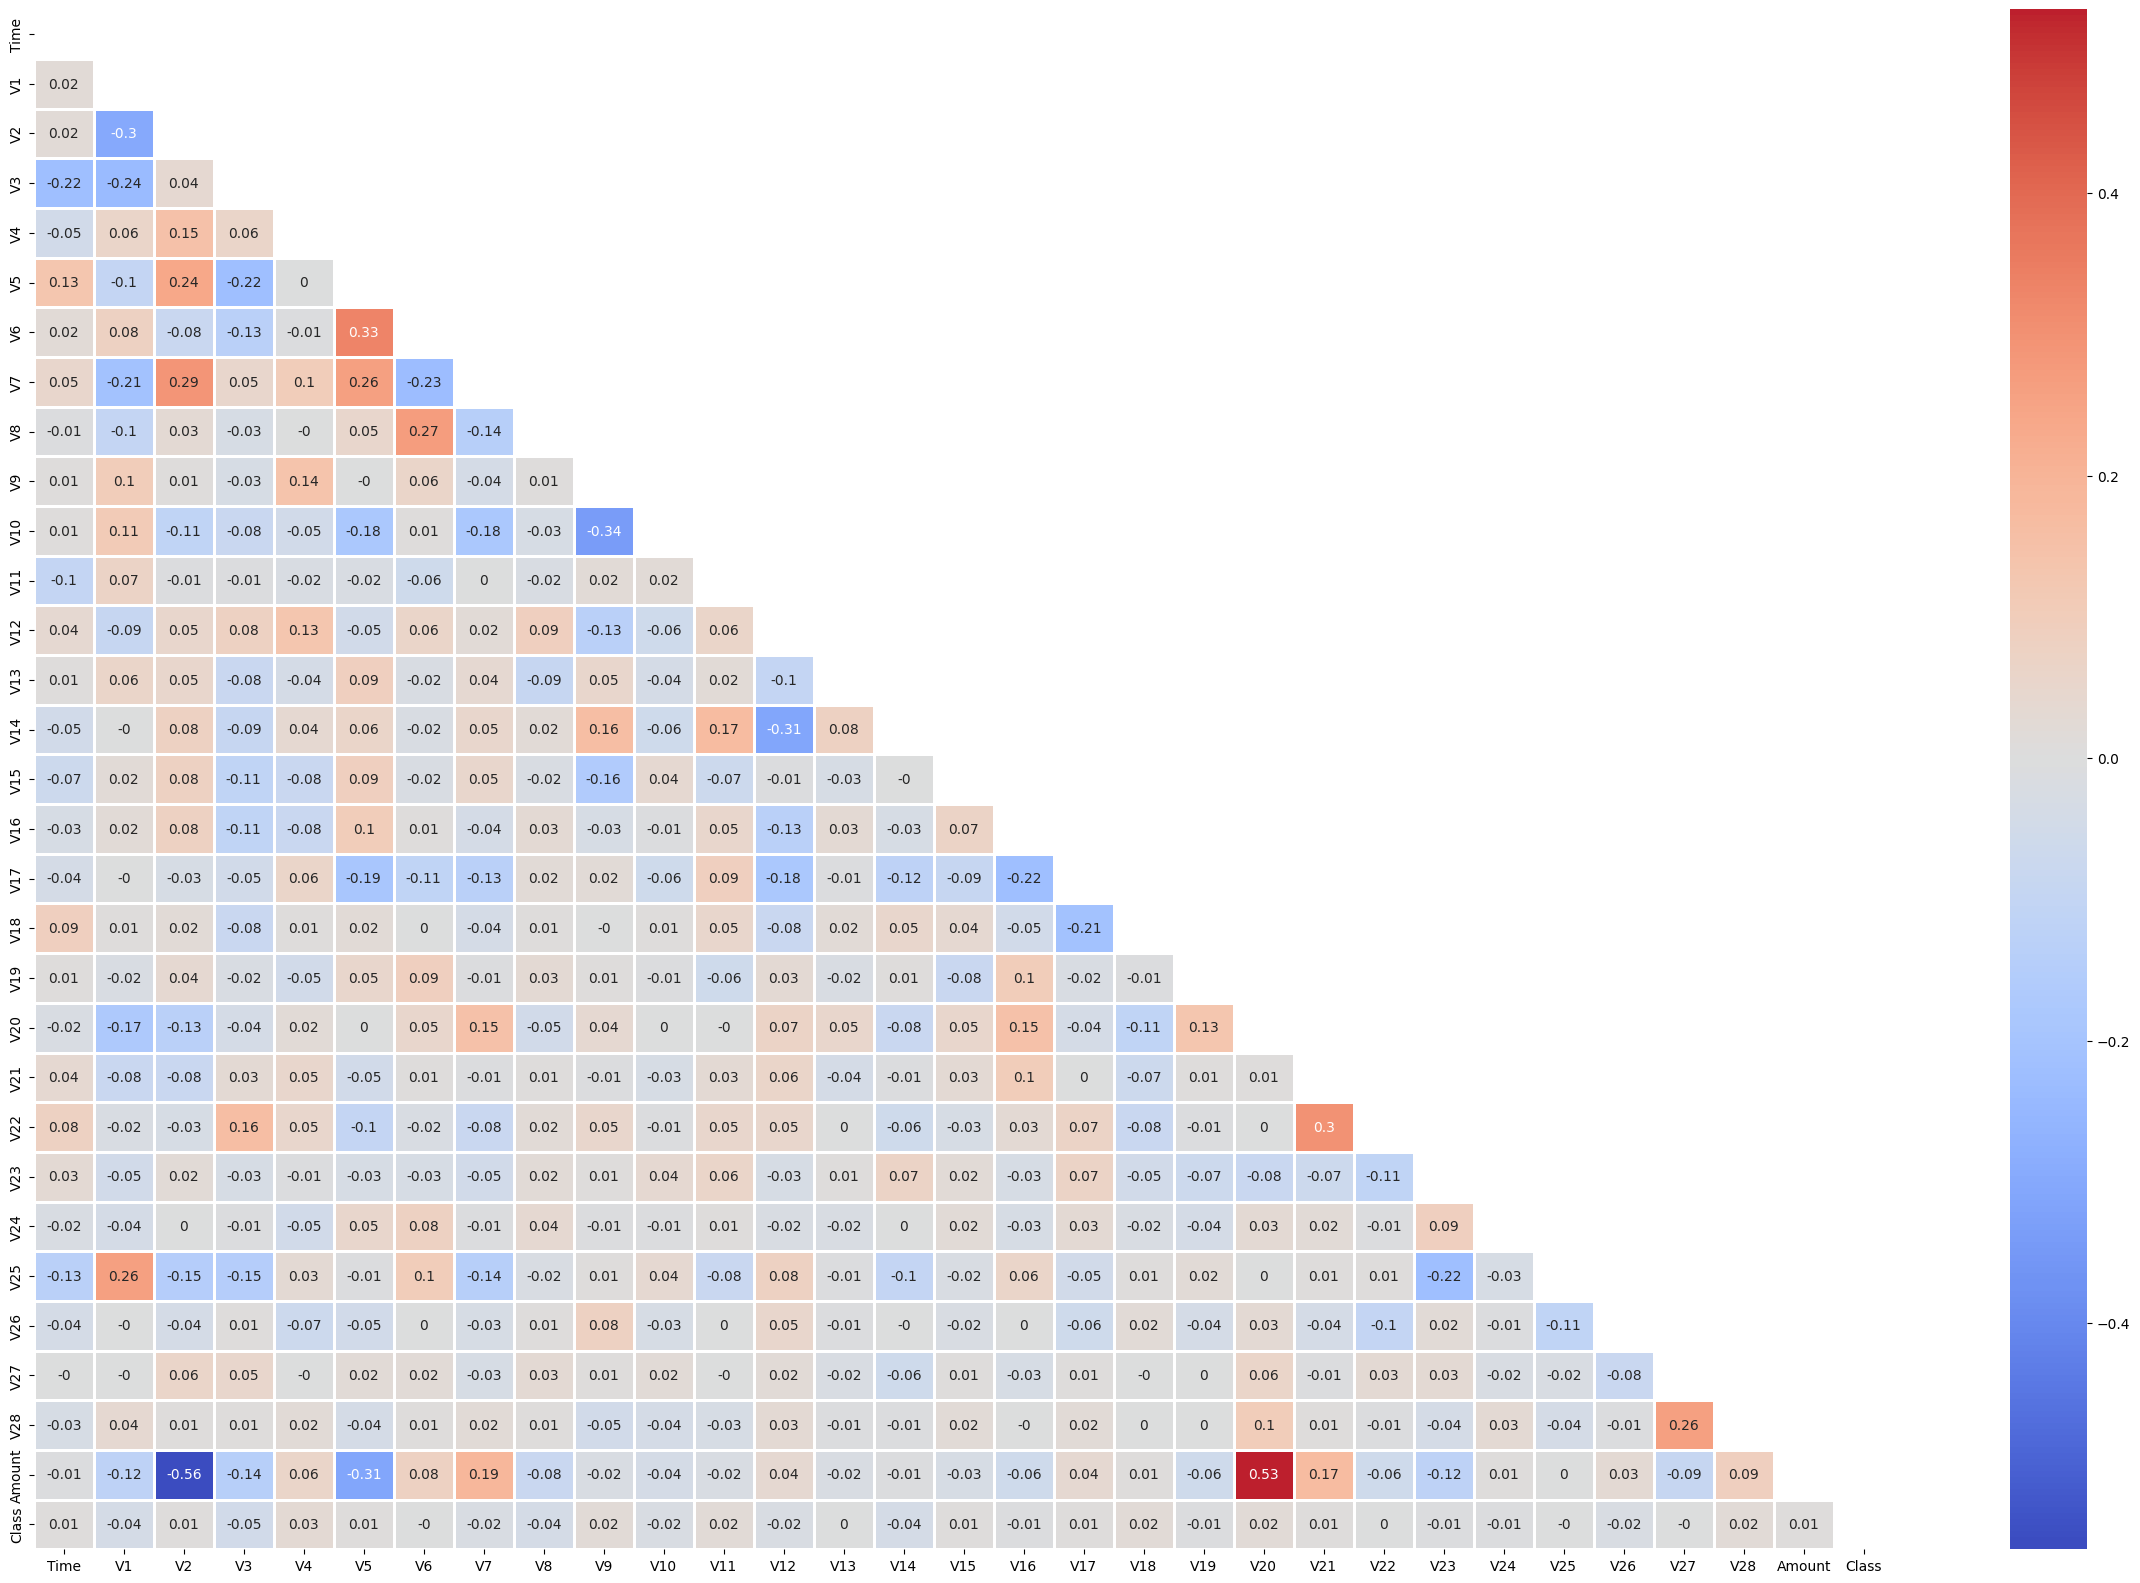

In [387]:
corr_df = train_exp.corr()

mask = np.triu(corr_df)

plt.figure(figsize=(30, 20))
sns.heatmap(corr_df.round(2), annot=True,  
            center=0, cmap="coolwarm", mask=mask, linewidths=1)


plt.show()

-------------------------------------------------------------------------------------------------------

#### After...

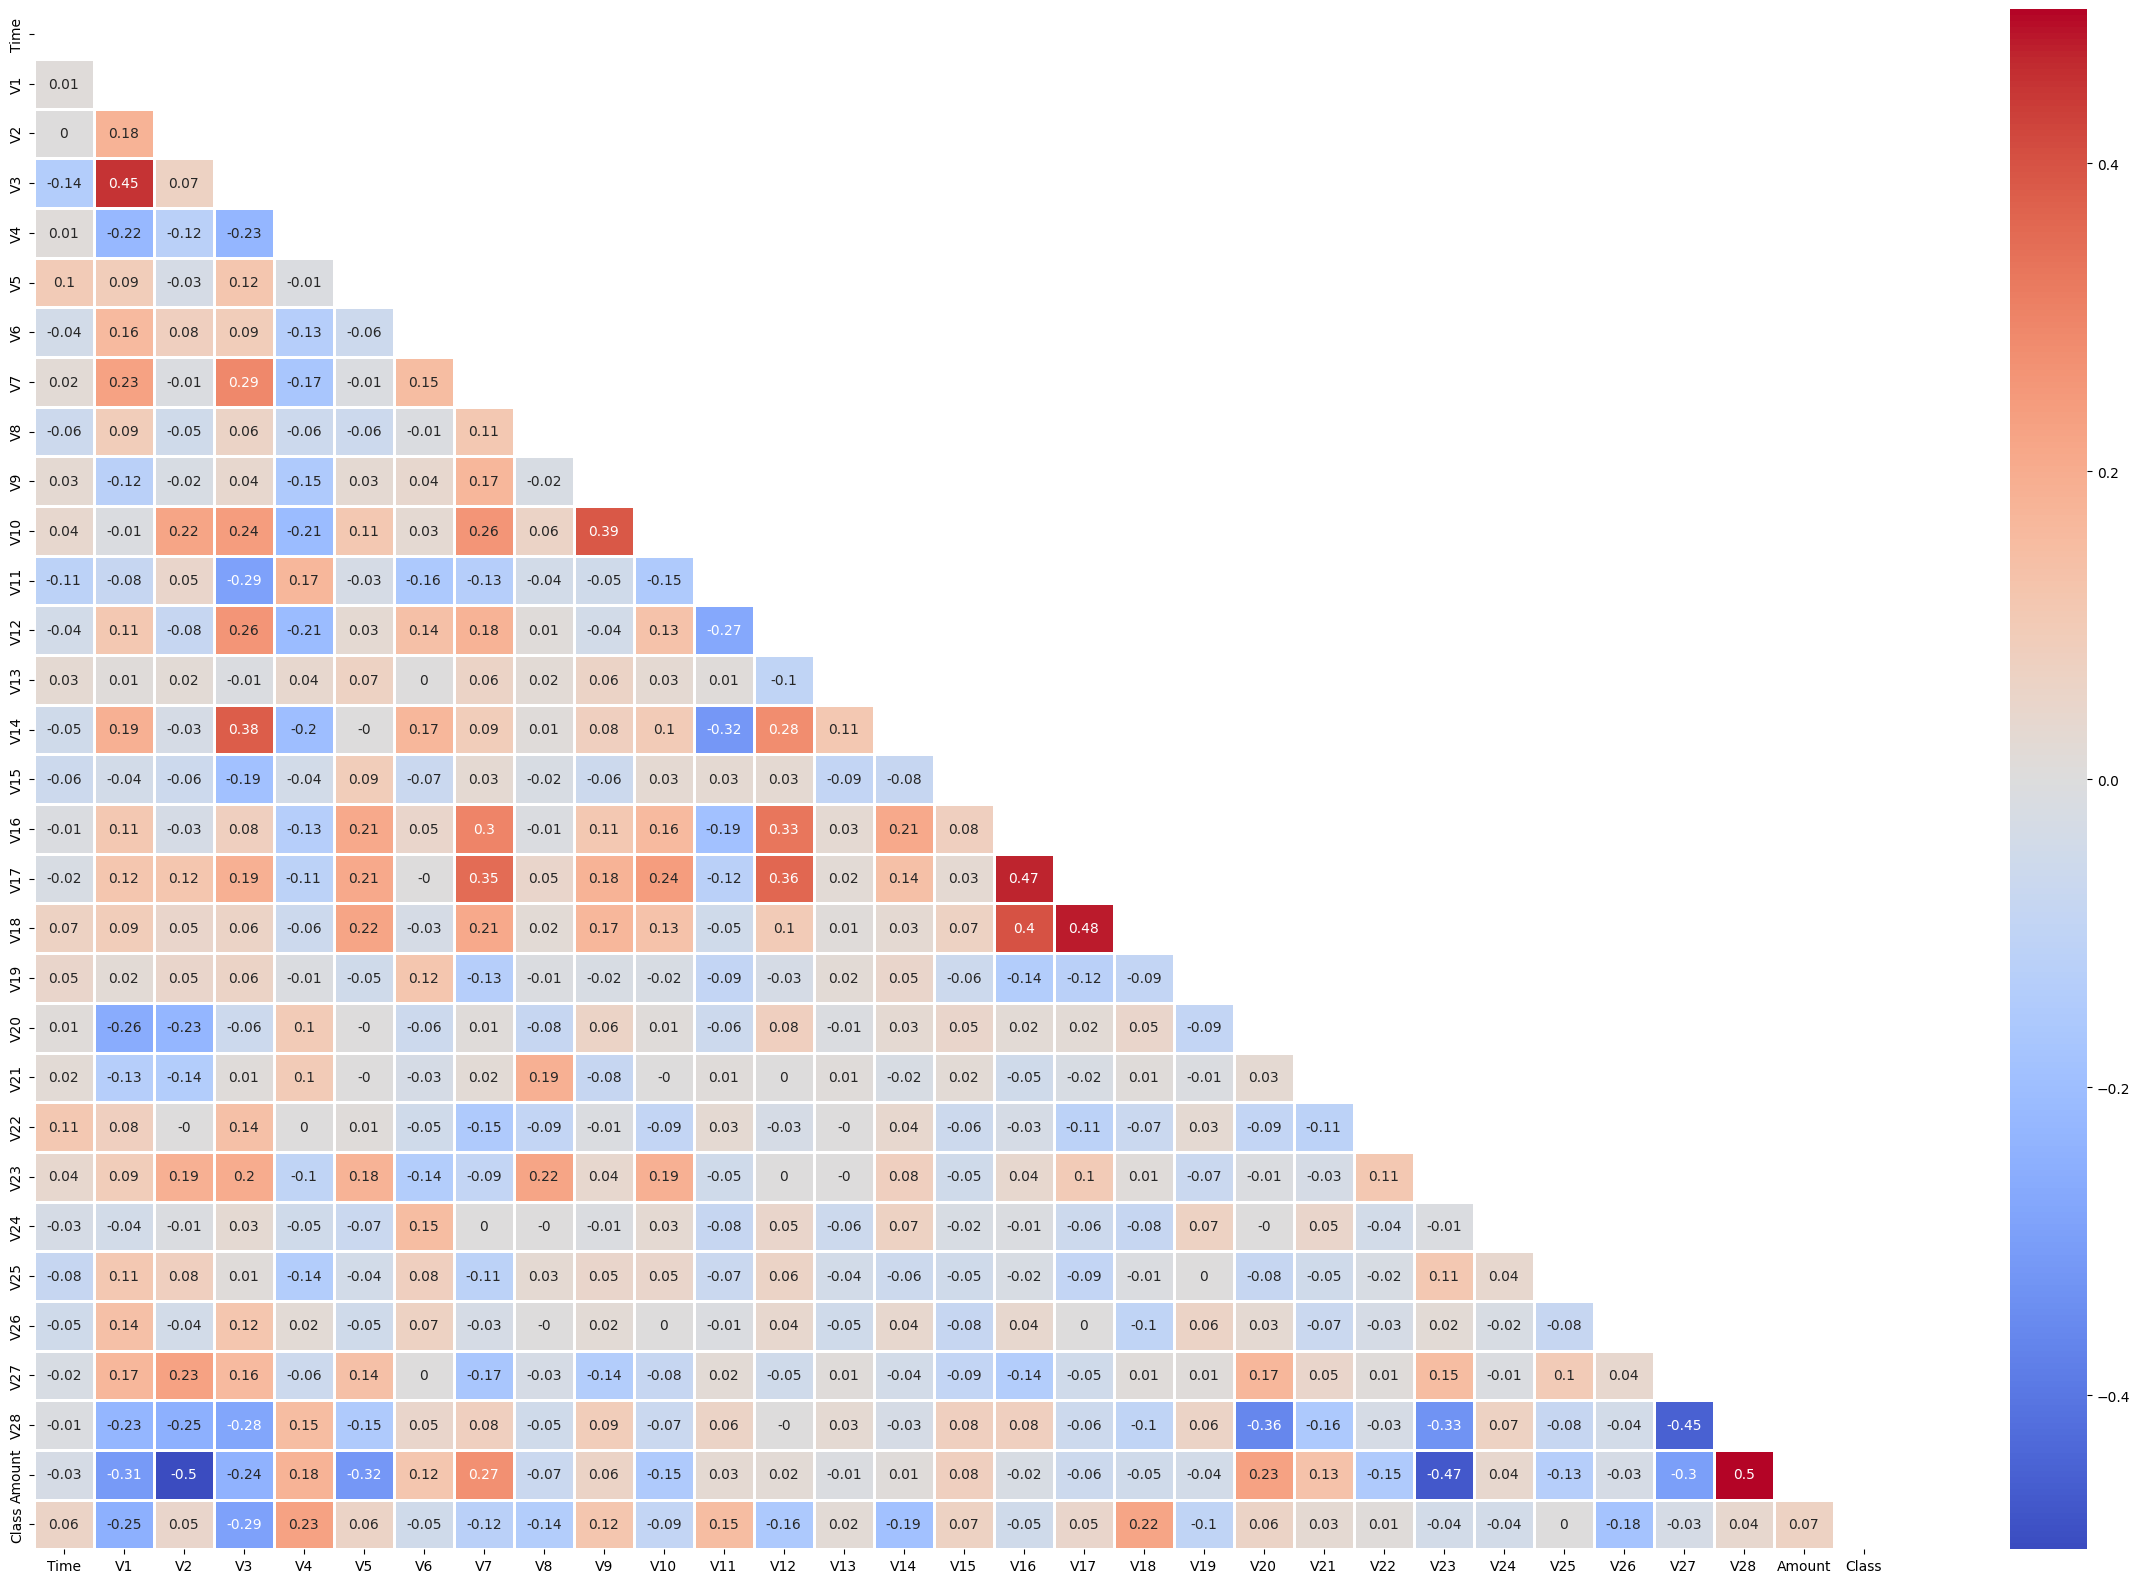

In [388]:
corr_df = train_exp2.corr()

mask = np.triu(corr_df)

plt.figure(figsize=(30, 20))
sns.heatmap(corr_df.round(2), annot=True,
            center=0, cmap="coolwarm", mask=mask, linewidths=1)


plt.show()

#### Therefore, 
Even after under-scaling, there isn't any overly colinear features, so no need to be dropped for that reason

-------------------------------------------------------------------------------------------------------

### Class Correlations

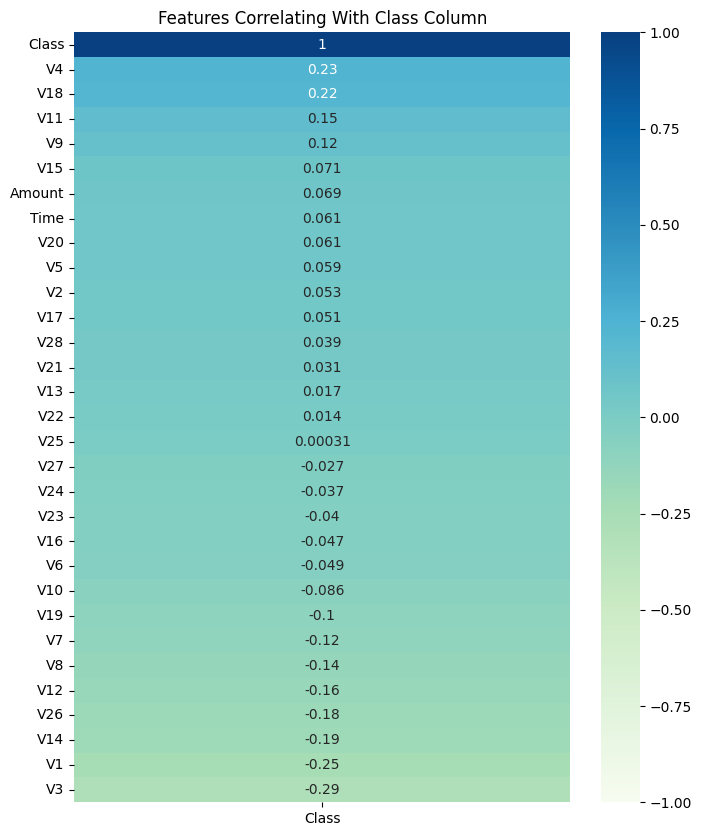

In [389]:
# Plot of features correlating with the class column 
new_train_correlations = train_exp2.corr(method='pearson')
plt.figure(figsize=(8, 10))
heatmap = sns.heatmap(new_train_correlations[['Class']].sort_values(by='Class', ascending=False), vmin=-1, vmax=1, annot=True, cmap='GnBu')
plt.title('Features Correlating With Class Column', fontsize=12)
plt.show()


-------------------------------------------------------------------------------------------------------

#### With this in mind:

Given we are not considering too many features as is, it doesn't make much sense in terms of computational expense to drop too many of these. As a good cut-off point, we **drop features below $\pm 0.05$**

In [390]:
## Code to implement this:

drop=[]
strong=[]
for i in train_exp2.columns:
    if train_exp2[i].corr(train_exp2['Class'])<0.05 and train_exp2[i].corr(train_exp2['Class'])>-0.05:
        drop.append(i)
    if train_exp2[i].corr(train_exp2['Class'])>0.1 or train_exp2[i].corr(train_exp2['Class'])<-0.1:
        strong.append(i)
train_exp2.drop(drop,axis=1,inplace=True)
strong.remove('Class')
train_exp2.shape

(938, 21)

In [391]:
train_exp2_copy = train_exp2.copy()
train_exp2_copy.drop('Class',axis=1,inplace=True)
test_exp=test_exp[train_exp2_copy.columns.tolist()]

-------------------------------------------------------------------------------------------------------

#### There goes 10 features!

In [392]:
len(drop)

10

-------------------------------------------------------------------------------------------------------

### Outliers in features

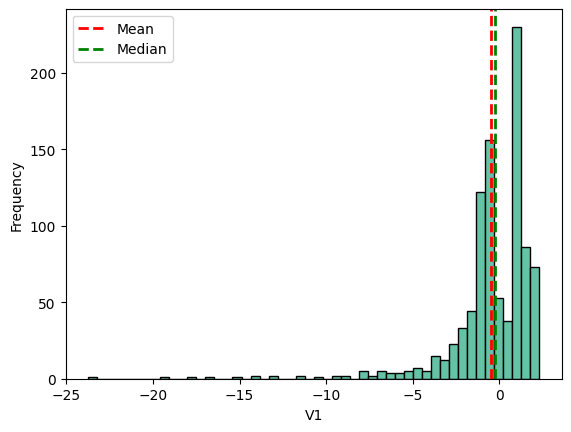

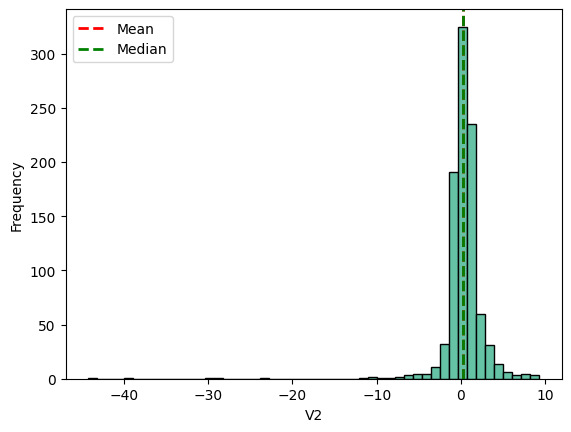

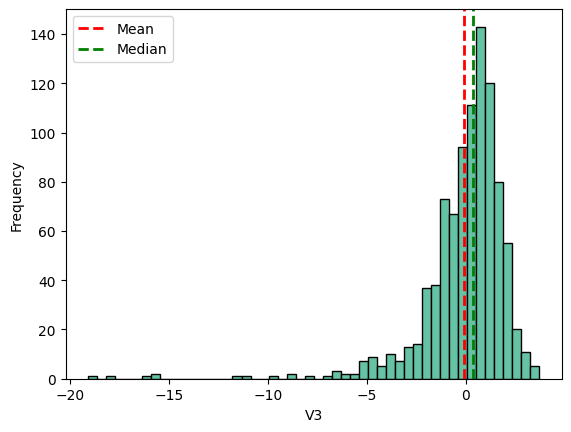

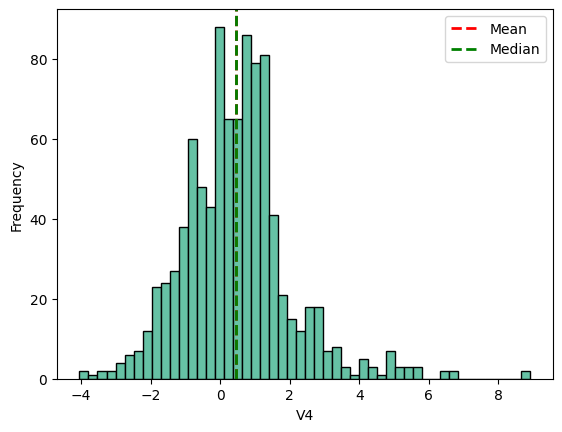

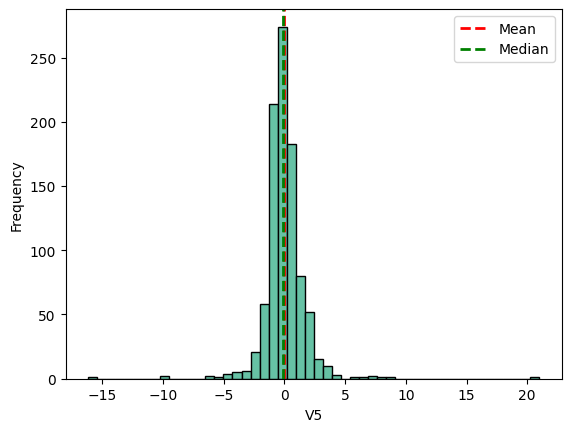

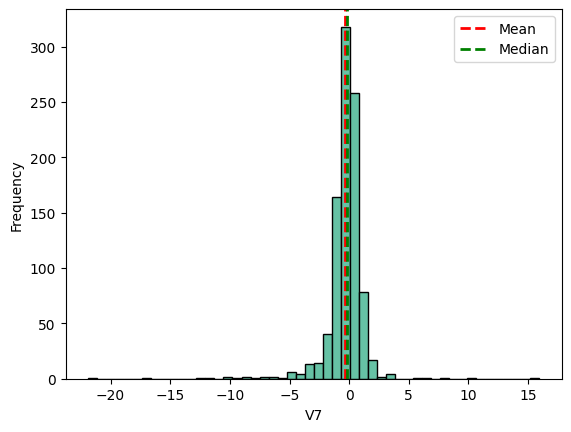

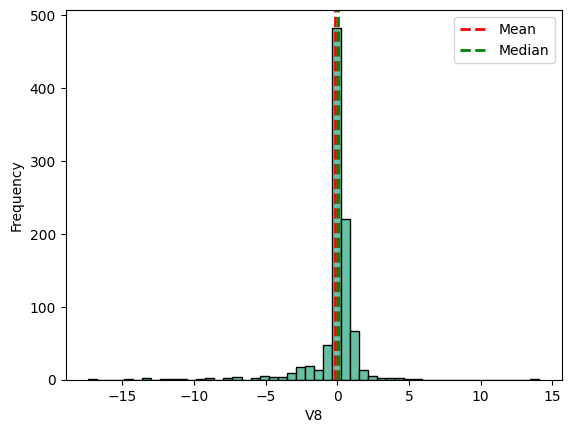

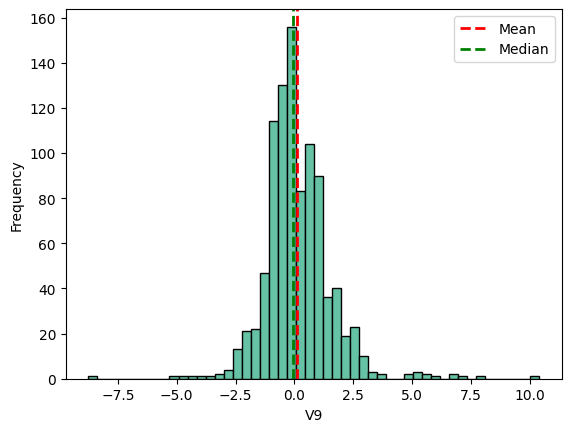

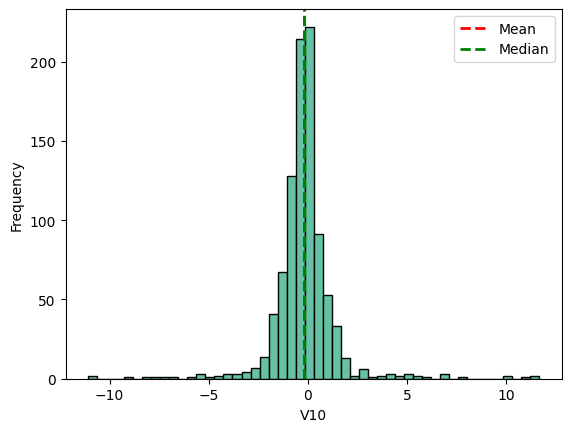

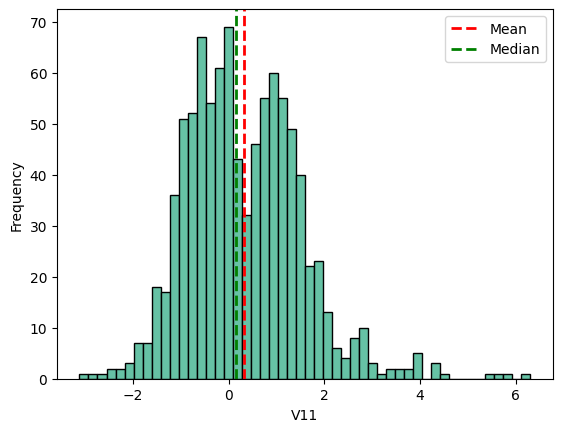

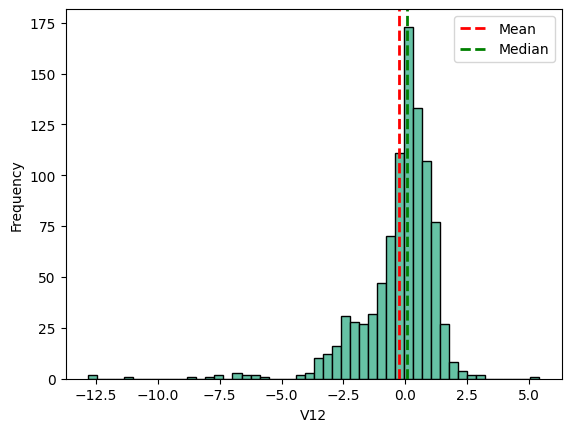

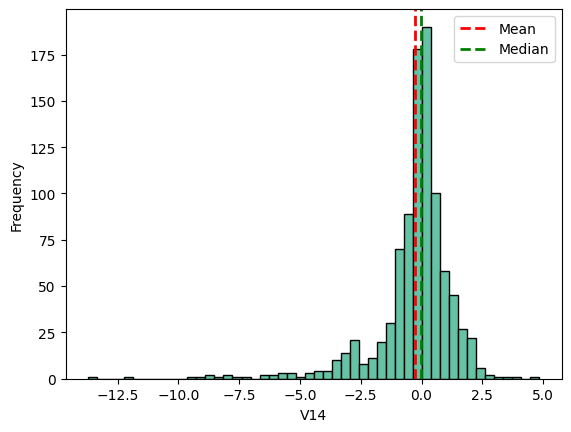

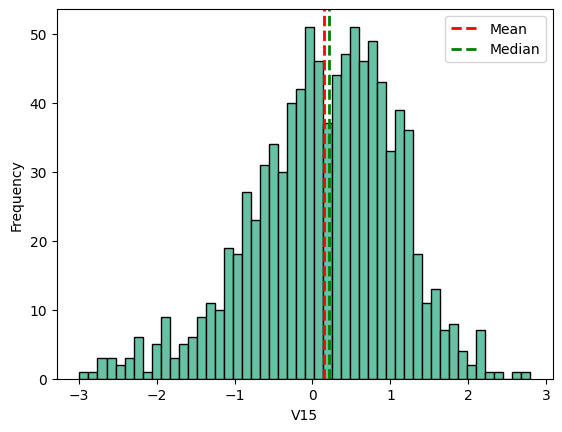

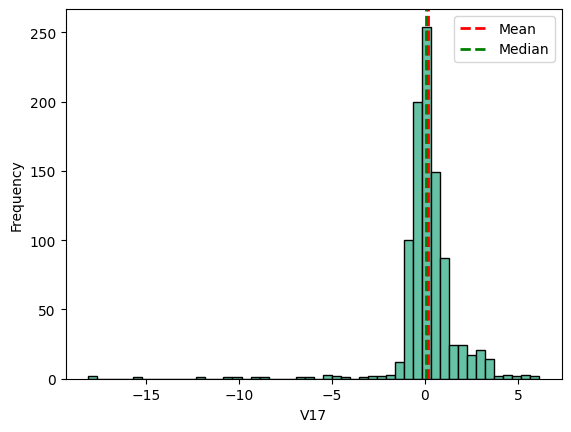

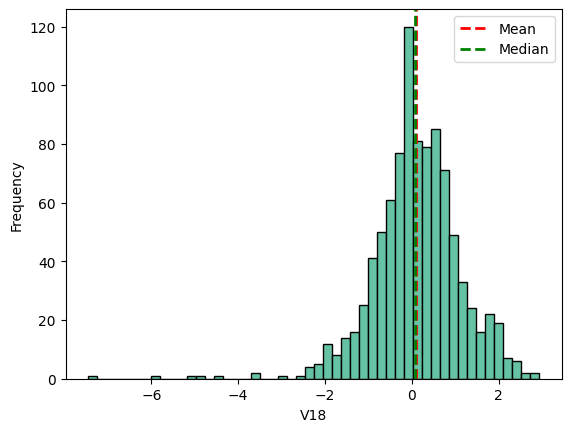

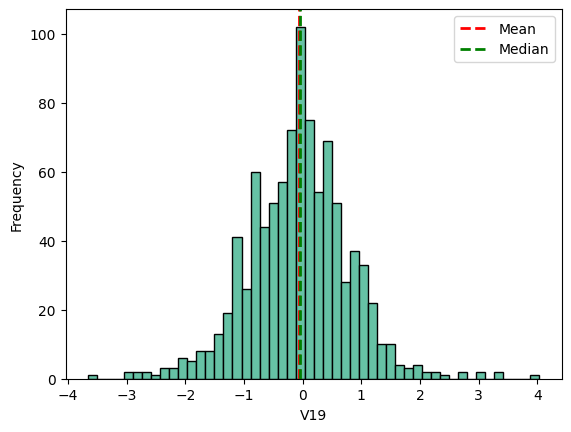

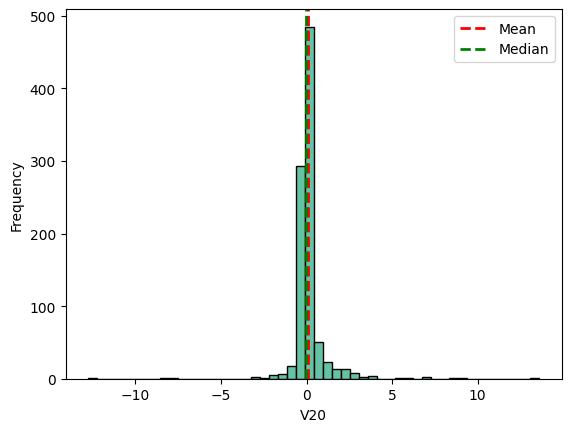

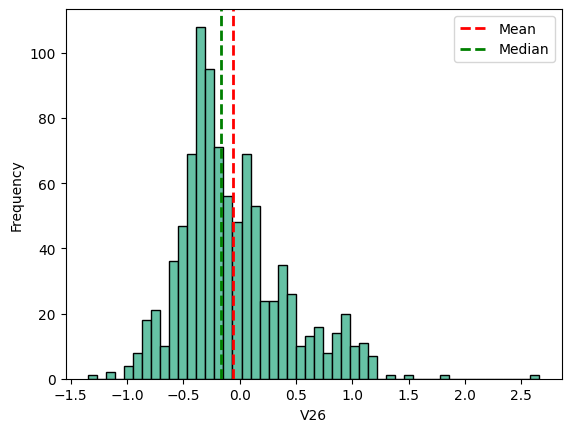

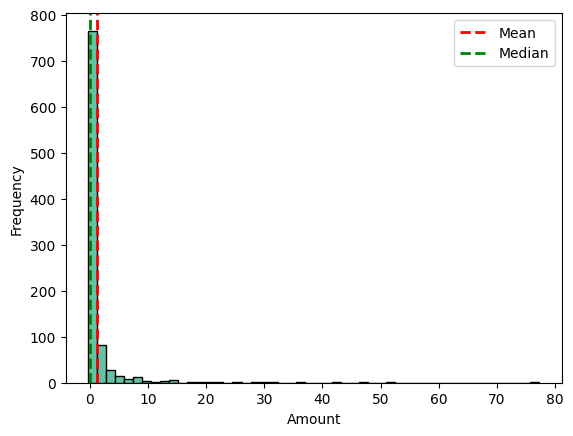

In [393]:
## View outliers:

for i in train_exp2.drop(columns=['Class','Time']):
    plt.hist(train_exp2[i], bins=50, edgecolor='black')
    plt.axvline(train_exp2[i].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(train_exp2[i].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
    plt.legend()
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

These give us a good sense of the distributions - most seem to have some pretty extreme outliers - but to better outline these, we use box plots. 

In [394]:
cols = train_exp2.columns.tolist()
cols.remove('Class')
cols.remove('Time')

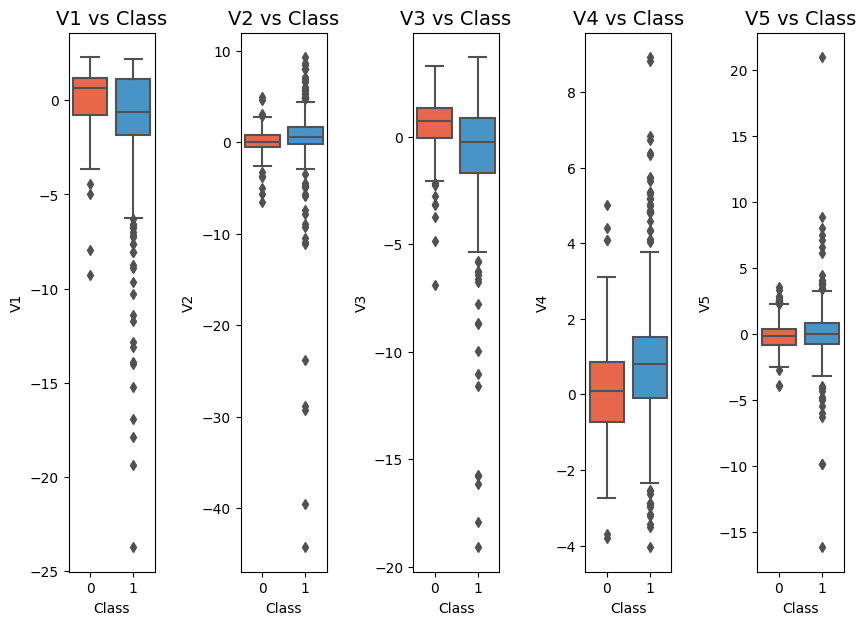

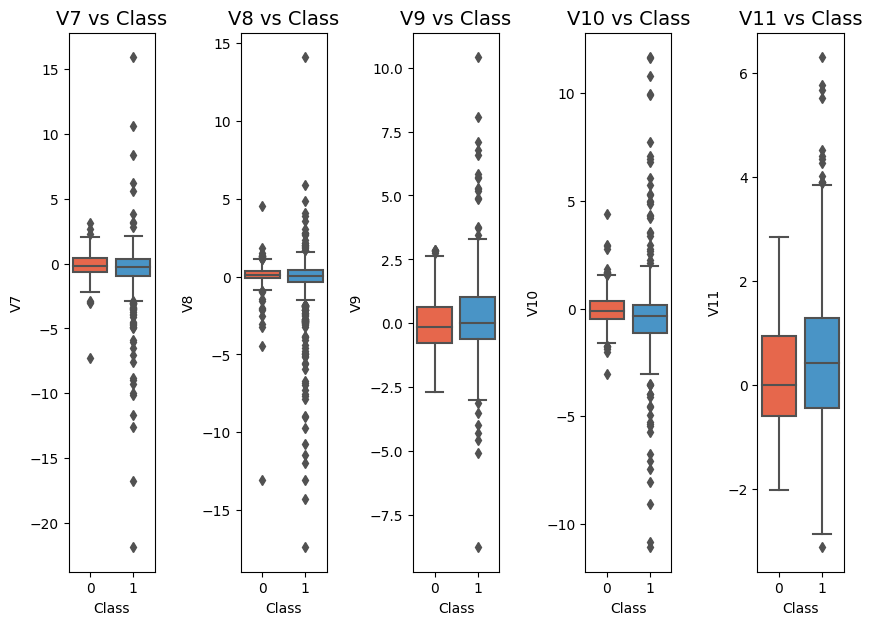

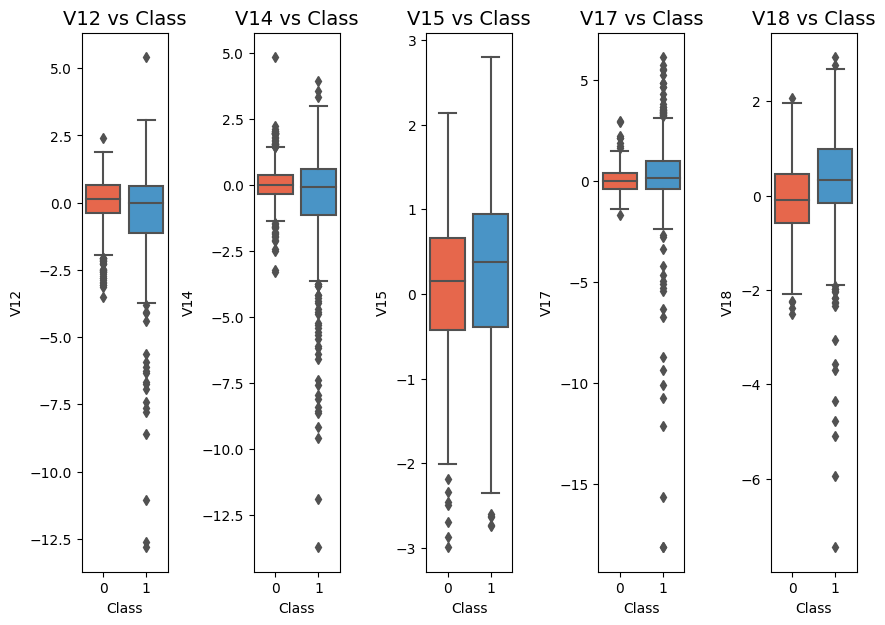

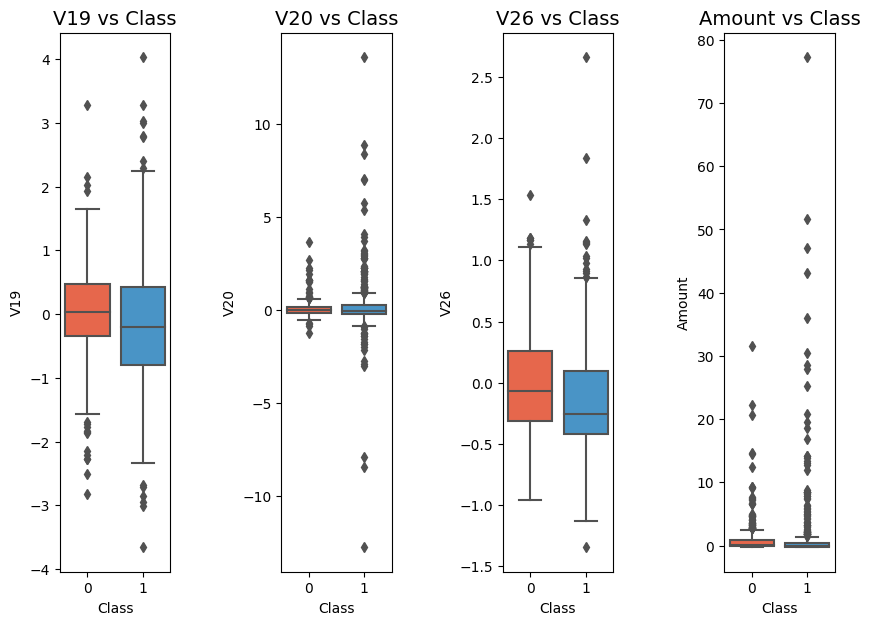

In [395]:
def plot_boxplot(df, cols, class_col, colors):
    n_cols = len(cols)
    fig, axes = plt.subplots(ncols=n_cols, figsize=(10, 7))

    for i, col in enumerate(cols):
        sns.boxplot(x=class_col, y=col, data=df, palette=colors, ax=axes[i])
        # Set individual plot titles and make them bold
        axes[i].set_title(f"{col} vs {class_col}", fontsize=14)
        axes[i].set_xlabel(class_col, fontsize=10)
        axes[i].set_ylabel(col, fontsize=10)
    plt.subplots_adjust(wspace=1)
    
    plt.show()

# looping over features to look at to better display plots
for i in range(4):
    plot_boxplot(train_exp2,cols[5*i:5*i+5],'Class',['#FF5733', '#3498DB'])

-------------------------------------------------------------------------------------------------------

#### What to remove?

When considering removing outliers here, it's a little tricky given so many features have undergone anonymisation - you cannot say if the most extremal outlier is significant or not. Still though, many as illustrated in the box plots have very extremal outliers. 

We also do not want to lose too much data since we already under-sampled our initial dataset of genuine transactions. 

With this in mind, it seems best to remove only the more extremal outliers in a few features, namely those more strongly correlating - we'll go with $3*IQR$ above and below the 75th and 25th percentiles. In terms of which ones we deem more strongly correlating, choose any above $\pm0.1$, which are stored in the list 'strong' from earlier





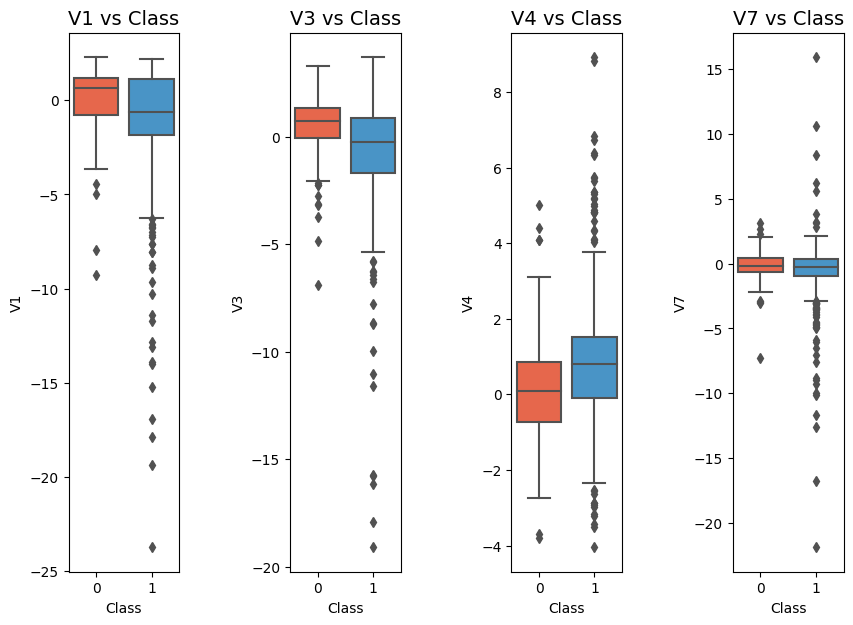

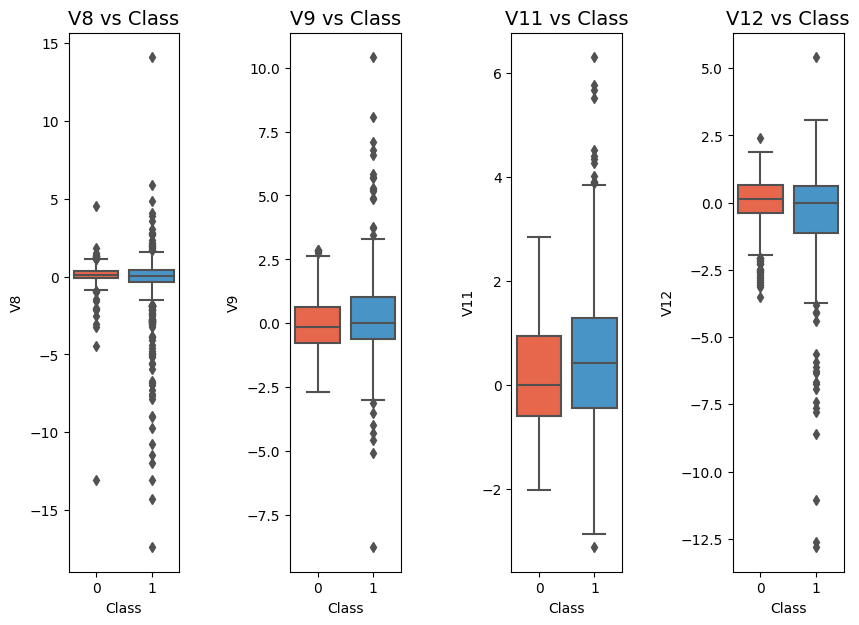

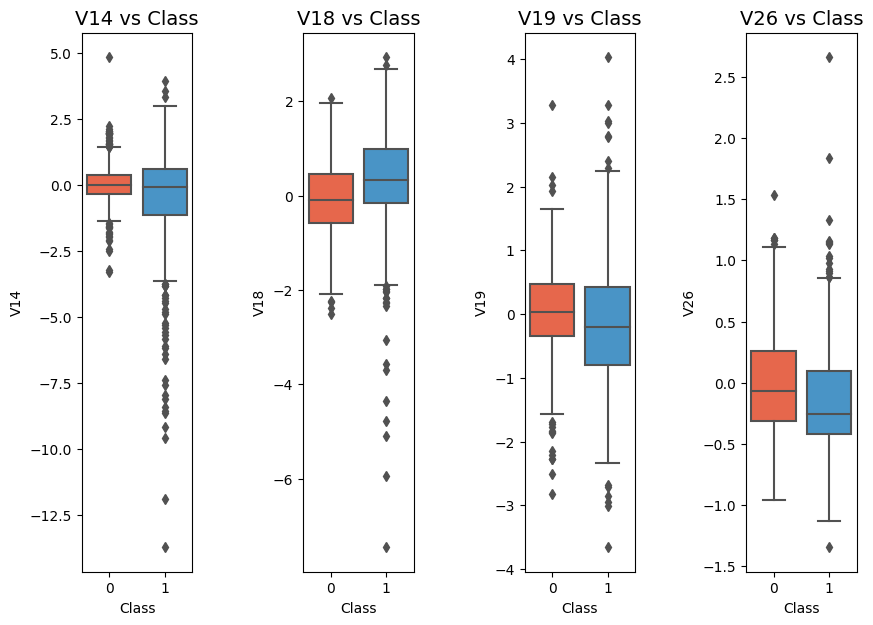

In [396]:
for i in range(3):
    plot_boxplot(train_exp2, strong[4*i:4*i+4],'Class',['#FF5733', '#3498DB'])

In [397]:
for i in strong:
    
    # locate genuine and fraudulent entries for a given feature
    gens = train_exp2.loc[train_exp2['Class']==0, i]
    frauds = train_exp2.loc[train_exp2['Class']==1, i]
    
    # 3*IQR cut off
    Cutoff_g = 3*(gens.quantile(0.75)-gens.quantile(0.25))
    Cutoff_f = 3*(frauds.quantile(0.75)-frauds.quantile(0.25))
    # Subtracted & Added to LQ and UQ respectively
    Lower_g, Upper_g = gens.quantile(0.25) - Cutoff_g, gens.quantile(0.75) + Cutoff_g 
    Lower_f, Upper_f = frauds.quantile(0.25) - Cutoff_f, frauds.quantile(0.75) + Cutoff_f
    
    # Mask to locate which genuine class entries exceed the cutoffs for the given feature
    
    gen_mask= (train_exp2['Class']==0)&((train_exp2[i]>Upper_g)|(train_exp2[i]<Lower_g))
    
    # Same for fraudulent
    fraud_mask= (train_exp2['Class']==1)&((train_exp2[i]>Upper_f)|(train_exp2[i]<Lower_f))
    
    # dropping outliers
    train_exp2=train_exp2.drop(train_exp2[gen_mask].index)
    train_exp2=train_exp2.drop(train_exp2[fraud_mask].index)
    
    # printing number of outliers 
    print(i, sum(gen_mask),sum(fraud_mask))
    

V1 2 11
V3 1 2
V4 0 1
V7 0 16
V8 7 44
V9 0 2
V11 0 0
V12 0 4
V14 3 5
V18 0 0
V19 2 1
V26 0 1


C:\Users\Julia\AppData\Local\Temp\ipykernel_26232\1318209568.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_exp2=train_exp2.drop(train_exp2[fraud_mask].index)
C:\Users\Julia\AppData\Local\Temp\ipykernel_26232\1318209568.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_exp2=train_exp2.drop(train_exp2[fraud_mask].index)
C:\Users\Julia\AppData\Local\Temp\ipykernel_26232\1318209568.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_exp2=train_exp2.drop(train_exp2[fraud_mask].index)
C:\Users\Julia\AppData\Local\Temp\ipykernel_26232\1318209568.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_exp2=train_exp2.drop(train_exp2[fraud_mask].index)
C:\Users\Julia\AppData\Local\Temp\ipykernel_26232\1318209568.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_exp2=train_exp2.drop(train_exp2[frau

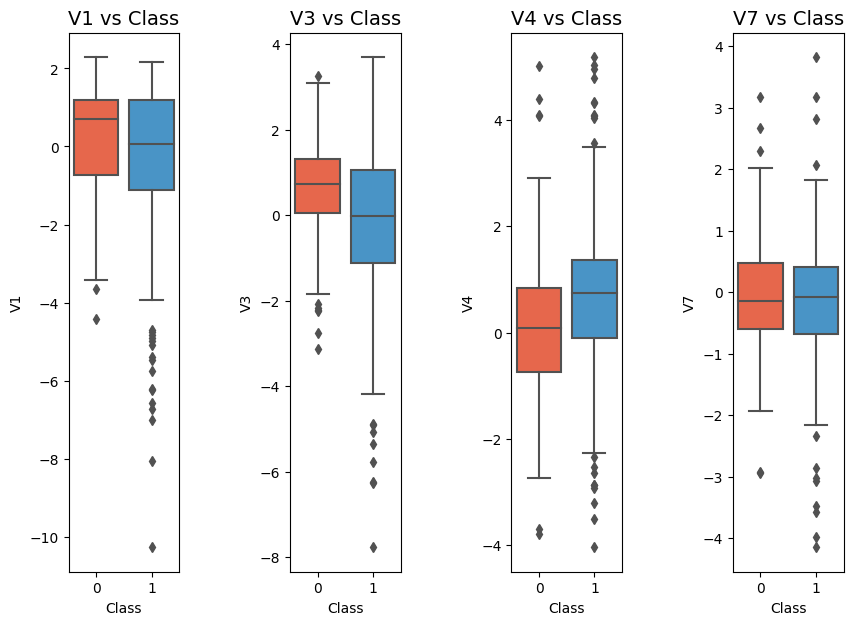

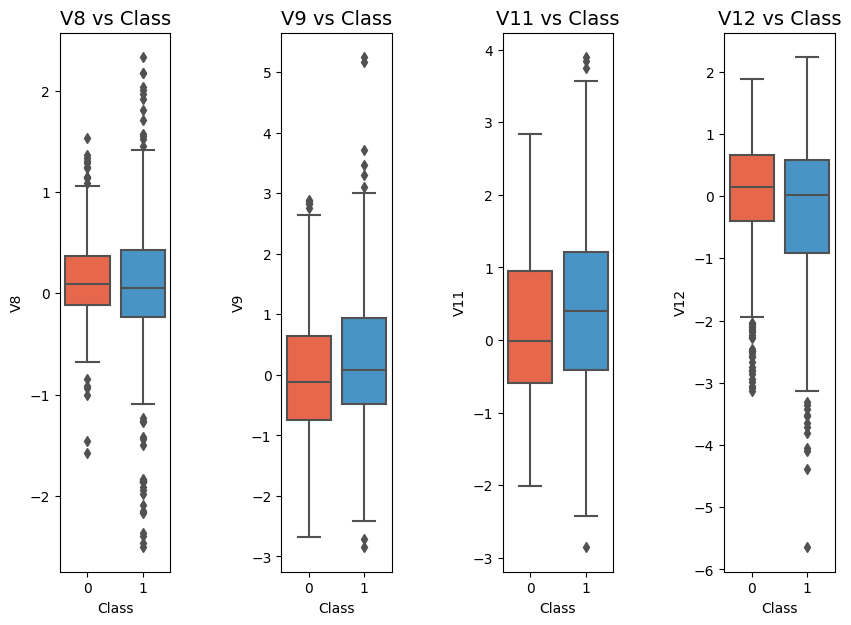

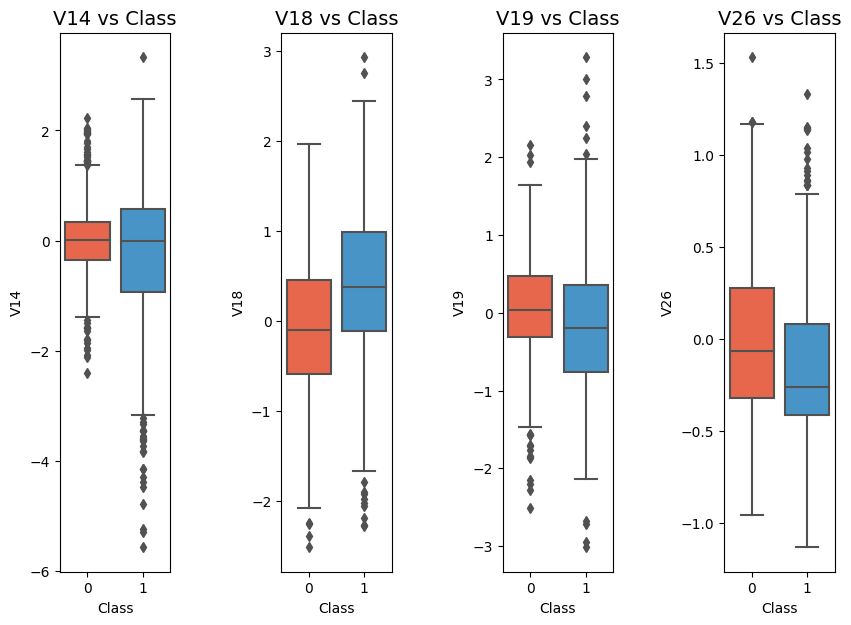

In [398]:
for i in range(3):
    plot_boxplot(train_exp2,strong[4*i:4*i+4],'Class',['#FF5733', '#3498DB'])

In [399]:
## Rename
train_under = train_exp2
test_under = test_exp

-------------------------------------------------------------------------------------------------------

#### For this data set we will consider the gradient boosting model - an alternative to the undersampling one towards the end of the model selection section (where we did not drop features etc)

In [400]:
## Check:

train_under

,Time,V1,V2,V3,V4,V5,V7,V8,V9,V10,V11,V12,V14,V15,V17,V18,V19,V20,V26,Amount,Class
0,0.602157,1.161956,-0.068773,-1.590793,-0.479912,2.174889,-0.001805,0.646750,-0.357801,-0.137549,0.010785,0.113364,0.674724,0.959758,-0.896529,-0.180872,-0.053268,0.181766,-0.675068,1.394142,0
1,0.644571,-1.163968,-1.368834,1.842226,-1.061150,-0.064233,-0.513929,-0.305039,-2.292226,1.664462,1.836983,-0.276658,-0.934126,0.597039,1.040816,-0.867364,0.389845,-0.362818,-0.056767,0.076870,0
2,0.699421,0.954024,-0.174392,0.672818,1.393767,-0.322846,-0.162848,0.331490,0.442324,-0.129295,1.272427,1.569099,-0.003750,-1.068606,0.347580,-0.722259,-0.171647,-0.078693,-0.315756,0.871219,0
3,0.608226,1.222529,-1.746127,0.453627,-1.035764,0.947193,-0.280166,-0.934172,-2.681101,1.836305,-0.157578,-0.878794,0.304829,0.551899,0.569170,-0.023513,0.351400,-0.149948,-0.081849,-0.061790,0
4,0.418474,-1.143747,0.817163,1.203777,1.331515,1.702669,-1.227801,1.252450,0.061940,-1.447044,-1.335829,0.553519,-1.869137,-0.492490,0.749187,0.540499,0.336899,0.407046,-0.034743,-0.252448,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,0.994440,2.039144,0.331717,-2.072626,0.292526,0.750169,0.346824,-0.346913,0.541437,-0.557925,-1.049086,0.124906,-0.992834,1.059812,0.022264,0.854327,-0.179946,-0.117443,-0.036478,0.111535,1
933,0.996591,2.169813,-0.045807,-2.079652,0.207907,0.722241,0.564011,-0.381757,0.403626,0.264935,-1.778153,-0.843704,0.839073,0.037256,-0.404518,-0.038491,0.420116,-0.286788,0.749486,-0.148626,1
935,0.996791,1.708900,-1.003900,-1.531147,-0.173086,-0.430068,-0.073634,-0.231775,-0.067886,0.501141,-1.559948,0.092857,0.051226,-0.474728,0.063361,1.073029,0.123317,-0.227253,-0.466157,3.716527,1
936,0.999808,-1.330035,1.912497,0.058653,4.098485,0.555525,-0.332319,1.016770,-1.751660,1.669879,-2.206718,-0.959271,0.769098,0.596934,0.246728,0.075046,1.193329,0.171426,0.080706,0.076870,1


-------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------
### Three imputation methods

In [401]:
## Import the necessary libraries:
# import sys
# import os
# import matplotlib
# import missingno
# import pandas
# import pandas as pd
# import numpy as np
# import random

In [402]:
## Read in train/ test data again, but under different name 

train = pandas.read_csv("C:/Users/Julia/OneDrive/Documents/Julias_stuff/University_stuff/St_Andrews/Semester_2/ID5059_Knowlegde_Disc_and_Datamining/Jupyter/Coursework2/Coursework2_stuff/train.csv")     
test = pandas.read_csv("C:/Users/Julia/OneDrive/Documents/Julias_stuff/University_stuff/St_Andrews/Semester_2/ID5059_Knowlegde_Disc_and_Datamining/Jupyter/Coursework2/Coursework2_stuff/test.csv")         

## Clear the maximum number of columns to be displayed so that all will be visible.
pandas.set_option('display.max_columns', None)

In [403]:
## Look over the data:
train

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,0.108782,-1.070243,-0.234910,-1.099360,0.502467,0.169318,0.065688,-0.306957,-0.323800,0.103348,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,0.908773,0.836798,-0.056580,-0.120990,-0.144028,-0.039582,1.653057,-0.253599,-0.814354,0.716784,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,-0.818383,-0.376512,-0.226546,-0.552869,-0.886466,-0.180890,0.230286,0.590579,-0.321590,-0.433959,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,-0.007527,0.637441,0.676960,-1.504823,0.554039,-0.824356,-0.527267,-0.095838,-0.312519,0.642659,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,-0.097495,1.338869,1.391399,-0.128167,-0.081836,0.100548,-0.338937,0.090864,-0.423645,-0.731939,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219124,219124,120580.0,1.891079,-1.272908,-3.783908,-1.388939,2.012789,2.666080,0.151740,0.401934,-1.102824,0.858158,-0.280639,0.007976,-0.124950,0.914374,-0.073169,-2.309929,-0.041423,1.190526,-0.281848,-0.195703,-0.181369,-0.456538,-0.069571,0.756765,0.244479,-0.147566,-0.054725,-0.044588,198.65,0
219125,219125,120580.0,0.139724,0.948649,-2.913655,-2.184829,1.883716,-1.056824,1.725624,0.018089,-0.823494,-0.257933,-0.457534,0.516146,-0.071240,1.310799,-1.892909,-0.318780,-0.917395,0.098397,-0.195558,-0.116538,0.491469,1.478823,-0.085398,-0.091409,-1.053488,0.467570,0.358918,0.294735,24.00,0
219126,219126,120580.0,2.058343,-0.038993,-1.928553,0.330117,0.270127,-0.735664,-0.173878,0.144823,0.849289,-0.136498,0.179926,-1.769641,-3.937694,0.031346,0.028100,0.883566,0.391801,1.007789,0.303376,-0.384830,-0.306640,-0.965783,0.307799,-0.021434,-0.343989,0.181065,-0.098387,-0.044064,1.79,0
219127,219127,120580.0,2.079227,-2.162389,-1.785833,-2.804889,0.552845,4.038013,-2.155900,1.023785,-0.865242,1.536193,-0.058879,-0.885949,-0.254718,-0.425730,0.665556,-0.336634,0.301966,0.391249,0.037770,-0.190984,0.109909,0.590401,0.286621,0.675660,-0.510736,-0.090044,0.056749,-0.017126,88.00,0


In [404]:
## How many unique classes/ how often do they show up?

value_counts = train['Class'].value_counts()
value_counts

## Heavily skewed to being non-fraud. transactions
## Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

0    218660
1       469
Name: Class, dtype: int64

In [405]:
## what was amount when class = fraud.?
train.loc[train['Class'] == 1, 'Amount']

1681      136.58
2039        2.00
2090        0.12
3072       23.31
3780        4.99
           ...  
218320      6.99
218396    498.25
218404    229.99
218937     20.00
219086      1.00
Name: Amount, Length: 469, dtype: float64

In [406]:
## Column names:
train.columns

Index(['id', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

-------------------------------------------------------------------------------------------------------

### Imputing the features

Creating a copy of the train data and then enerating a list of random values for the index positions and removing them from the columns.This is performed using mask which can then be used to remove the values and retrieve the old ones, the columns are printed with the percentage of data removed.

In [407]:
#Making a copy of the train data
trainInput = train.copy()

#removing the necassary columns
trainInput = trainInput.drop(columns = ['id','Time','Amount','Class'])

#checking the shape is the same
print(trainInput.shape)
trainInput_missing = trainInput.copy()

#creating a mask for the data using random, which will fill the given percentage.
mask = np.random.choice([True,False],size=trainInput.shape[0],p=[0.2,0.8])

#Using the mask to remove make the values empty with np.nan
trainInput_missing.loc[mask,:] = np.nan

#printing percentage of missing values in each column
trainInput_missing.isnull().mean()*100

(219129, 28)


V1     20.092731
V2     20.092731
V3     20.092731
V4     20.092731
V5     20.092731
V6     20.092731
V7     20.092731
V8     20.092731
V9     20.092731
V10    20.092731
V11    20.092731
V12    20.092731
V13    20.092731
V14    20.092731
V15    20.092731
V16    20.092731
V17    20.092731
V18    20.092731
V19    20.092731
V20    20.092731
V21    20.092731
V22    20.092731
V23    20.092731
V24    20.092731
V25    20.092731
V26    20.092731
V27    20.092731
V28    20.092731
dtype: float64

#### Now,
Using the missingno package to visualise that each column has the same number of missing values. This visualisation will look more sparse with an increased percentage of missing values.

<AxesSubplot: >

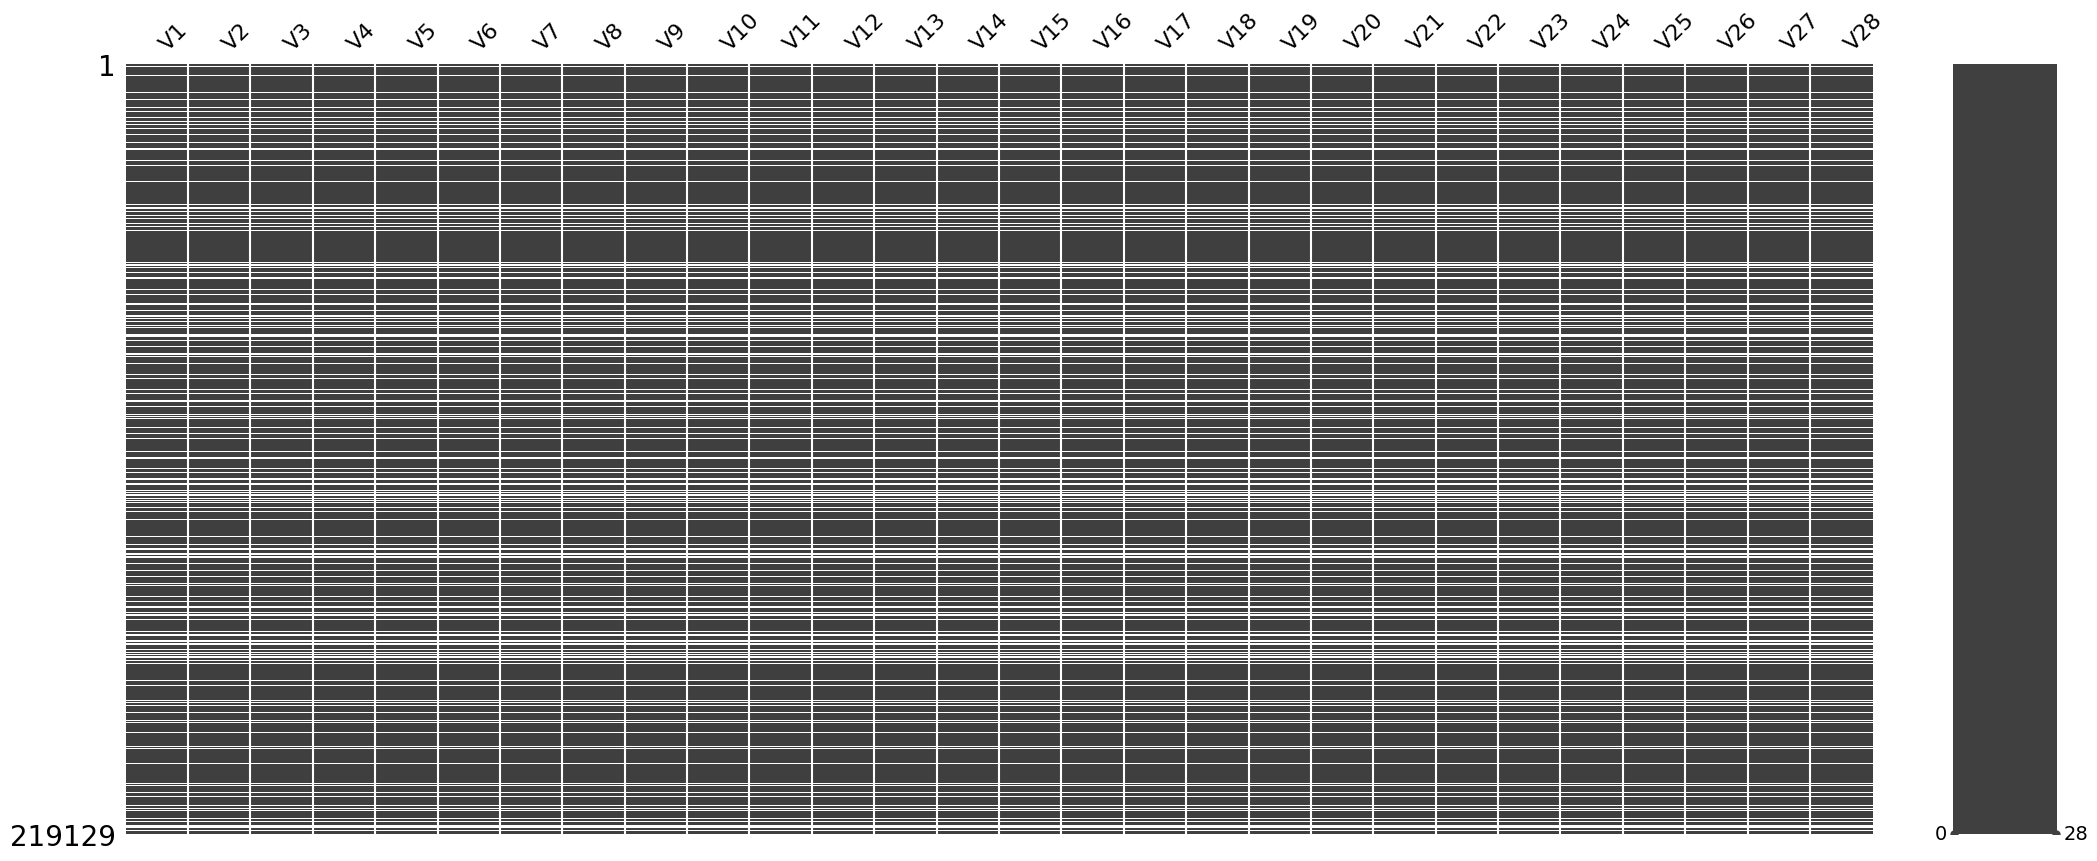

In [408]:
import missingno as msno

msno.matrix(trainInput_missing)

-------------------------------------------------------------------------------------------------------

#### Standard deviation of columns
Inspecting the the standard deviation of the columns in the dataset. The standard deviation appears to be very small for the columns indicating the spread of data is very small. This gives an indication of why changing the percent of missing values has less of an effect than expected.

In [409]:
trainInput.std()

V1     1.395425
V2     1.159805
V3     1.132884
V4     1.253125
V5     1.069530
V6     1.202411
V7     0.817207
V8     0.716212
V9     1.054143
V10    0.821889
V11    0.976946
V12    0.998470
V13    1.039145
V14    0.801335
V15    0.891613
V16    0.786654
V17    0.691709
V18    0.784454
V19    0.739928
V20    0.439521
V21    0.422777
V22    0.597812
V23    0.318175
V24    0.593100
V25    0.406741
V26    0.473867
V27    0.233355
V28    0.164859
dtype: float64

-------------------------------------------------------------------------------------------------------

## Imputing the missing values
Replacing the now null values using the mean simple imputer first and defining a function 'assesImputation' which returns an RMSE score for the replaced values.

In [410]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

trainInput_mean = trainInput_missing.copy()
mean_imputer = SimpleImputer(strategy='mean')
trainInput_mean = pd.DataFrame(mean_imputer.fit_transform(trainInput_mean))

#trainInput_mean_df.head()
def assessImputation(original, newData):
    mse_per_column = []
    rmse_column = []
    for col_idx, col_name in enumerate(original.columns):
        removed_col = original.loc[mask, col_name]
        imputed_col = newData.loc[mask, col_idx]
        mse = 0
        rmse = 0
        mse = mean_squared_error(removed_col, imputed_col)
        mse_per_column.append(mse)
        rmse = np.sqrt(mse)
        rmse_column.append(rmse)
    #for col_name, col_mse in zip(trainInput.columns, mse_per_column):
    #    print(f"{col_name}: {col_mse}")
    print(rmse_column)
    print("average:" )
    
    print(sum(rmse_column)/len(rmse_column))
    
assessImputation(trainInput,trainInput_mean)

[1.389440541300245, 1.1555921557976936, 1.1331665343616537, 1.2573037964655494, 1.0746633636224978, 1.2035678805531929, 0.8142889106055656, 0.7159750568295737, 1.0553385987892185, 0.8275418774148359, 0.9795464958713411, 1.0064723127737243, 1.042649110831898, 0.804960229318873, 0.8956829747645967, 0.7865341087736015, 0.7000575437606953, 0.7791735140015631, 0.7376292972257581, 0.44384763092036045, 0.39075972206404647, 0.5984025818544072, 0.3382785488508789, 0.5918097405268792, 0.40739000319959073, 0.4717313370269841, 0.23469486374728177, 0.15205488100588296]
average:
0.7853054861520855


-------------------------------------------------------------------------------------------------------

#### Most Frequent Imputation
Imputing the values with the most frequent value in the column and printing the results. As expected, the most frequent method produces the worst results with a high RMSE over 1.

In [411]:
trainInput_frequent = trainInput_missing.copy()
frequent_imputator = SimpleImputer(strategy='most_frequent')
trainInput_frequent = pd.DataFrame(frequent_imputator.fit_transform(trainInput_frequent))
assessImputation(trainInput,trainInput_frequent)

[2.3959535182240415, 1.2142883740207358, 3.533380043178883, 1.5570918901148905, 2.8367737480470954, 3.273086618612726, 0.8686927731761139, 0.9185094888876086, 1.2405321169001085, 0.8282820803990012, 0.9837104175476901, 1.0907479090176422, 1.0533742524686038, 1.0171244240717745, 1.4716143883198658, 0.8751745047856502, 0.9481388420374328, 0.779223847861606, 0.8046531514263245, 0.4829657046699565, 0.4934124722697986, 1.0749716310597222, 0.3457691264491019, 0.9372374502933225, 0.4738838539138435, 0.6255853704402382, 0.23515942011339094, 0.17086230223817359]
average:
1.161792847162334


-------------------------------------------------------------------------------------------------------

#### Mice Imputation
Trying the mice approach which is popular in industry. Seems like a complicated model that should produce the best results. As expected the mice approach does produce the best results with the lowest RMSE.

In [412]:
# # Imputing with MICE
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# from sklearn import linear_model

mice_imputation = trainInput_missing.copy()
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')
mice_imputation = pd.DataFrame(mice_imputer.fit_transform(mice_imputation))
assessImputation(trainInput,mice_imputation)

[1.389440541300245, 1.1555921557976938, 1.1331665343616537, 1.2573037964655494, 1.074663363622498, 1.2035678805531929, 0.8142889106055656, 0.7159750568295737, 1.0553385987892185, 0.8275418774148359, 0.9795464958713412, 1.0064723127737243, 1.042649110831898, 0.804960229318873, 0.8956829747645967, 0.7865341087736015, 0.7000575437606953, 0.7791735140015631, 0.7376292972257581, 0.44384763092036045, 0.3907597220640465, 0.5984025818544072, 0.3382785488508789, 0.5918097405268792, 0.40739000319959073, 0.47173133702698417, 0.23469486374728177, 0.15205488100588296]
average:
0.7853054861520855


## Comparing Imputators
When looking at the results Mice and the Mean produce similar results with low RMSE values. As expected the most freqeunt imputation produces the worst results, with a high RMSE value. Mice gains the best results and is also the most complex with a higher running time.

-------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------


-------------------------------------------------------------------------------------------------------
## Data cleaning

Aim: Familiarise yourself with the dataset, understand the dataset, validate the dataset and determine if the dataset can be used for the next machine learning or deep learning.

In [413]:
# # Importing libraries
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# # Automatic display of drawings
# %matplotlib inline

# import seaborn as sns

In [414]:
# Read in the data (again)

Credit_card_train = pandas.read_csv("C:/Users/Julia/OneDrive/Documents/Julias_stuff/University_stuff/St_Andrews/Semester_2/ID5059_Knowlegde_Disc_and_Datamining/Jupyter/Coursework2/Coursework2_stuff/train.csv")     
Credit_card_test = pandas.read_csv("C:/Users/Julia/OneDrive/Documents/Julias_stuff/University_stuff/St_Andrews/Semester_2/ID5059_Knowlegde_Disc_and_Datamining/Jupyter/Coursework2/Coursework2_stuff/test.csv")         


In [415]:
## look at data again:
Credit_card_train.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,0.108782,-1.070243,-0.234910,-1.099360,0.502467,0.169318,0.065688,-0.306957,-0.323800,0.103348,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,0.908773,0.836798,-0.056580,-0.120990,-0.144028,-0.039582,1.653057,-0.253599,-0.814354,0.716784,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,-0.818383,-0.376512,-0.226546,-0.552869,-0.886466,-0.180890,0.230286,0.590579,-0.321590,-0.433959,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,-0.007527,0.637441,0.676960,-1.504823,0.554039,-0.824356,-0.527267,-0.095838,-0.312519,0.642659,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,-0.097495,1.338869,1.391399,-0.128167,-0.081836,0.100548,-0.338937,0.090864,-0.423645,-0.731939,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0


#### Recall, 
- The dataset contains 31 columns of variables, where V1, V2, . . V28 are anonymous variables. 

- Time is the interval in seconds between each transaction and the first transaction in the dataset.

- Amount is the amount of the transaction, and Class is a categorical variable that is 1 in the case of fraud and 0 otherwise.

-------------------------------------------------------------------------------------------------------

### Check the 'Class' column:

In [416]:
## Just two categories for the Class feature:

Credit_card_train.Class.unique() 

array([0, 1], dtype=int64)

##### Class column contains 2 values (fraud: 1, not fraud: 0), data normal

-------------------------------------------------------------------------------------------------------

### Conclusion 

Overall, from the previous investigation and the brief one here, the dataset provided is clean and does not require cleaning.

-------------------------------------------------------------------------------------------------------
## Developing Models to predict the fraudulent class

In [417]:
## Read in the data:

train = pandas.read_csv("C:/Users/Julia/OneDrive/Documents/Julias_stuff/University_stuff/St_Andrews/Semester_2/ID5059_Knowlegde_Disc_and_Datamining/Jupyter/Coursework2/Coursework2_stuff/train.csv")     
test = pandas.read_csv("C:/Users/Julia/OneDrive/Documents/Julias_stuff/University_stuff/St_Andrews/Semester_2/ID5059_Knowlegde_Disc_and_Datamining/Jupyter/Coursework2/Coursework2_stuff/test.csv")     

-------------------------------------------------------------------------------------------------------

### Do a bit of investigation again to guide us:

In [418]:
train

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,0.108782,-1.070243,-0.234910,-1.099360,0.502467,0.169318,0.065688,-0.306957,-0.323800,0.103348,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,0.908773,0.836798,-0.056580,-0.120990,-0.144028,-0.039582,1.653057,-0.253599,-0.814354,0.716784,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,-0.818383,-0.376512,-0.226546,-0.552869,-0.886466,-0.180890,0.230286,0.590579,-0.321590,-0.433959,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,-0.007527,0.637441,0.676960,-1.504823,0.554039,-0.824356,-0.527267,-0.095838,-0.312519,0.642659,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,-0.097495,1.338869,1.391399,-0.128167,-0.081836,0.100548,-0.338937,0.090864,-0.423645,-0.731939,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219124,219124,120580.0,1.891079,-1.272908,-3.783908,-1.388939,2.012789,2.666080,0.151740,0.401934,-1.102824,0.858158,-0.280639,0.007976,-0.124950,0.914374,-0.073169,-2.309929,-0.041423,1.190526,-0.281848,-0.195703,-0.181369,-0.456538,-0.069571,0.756765,0.244479,-0.147566,-0.054725,-0.044588,198.65,0
219125,219125,120580.0,0.139724,0.948649,-2.913655,-2.184829,1.883716,-1.056824,1.725624,0.018089,-0.823494,-0.257933,-0.457534,0.516146,-0.071240,1.310799,-1.892909,-0.318780,-0.917395,0.098397,-0.195558,-0.116538,0.491469,1.478823,-0.085398,-0.091409,-1.053488,0.467570,0.358918,0.294735,24.00,0
219126,219126,120580.0,2.058343,-0.038993,-1.928553,0.330117,0.270127,-0.735664,-0.173878,0.144823,0.849289,-0.136498,0.179926,-1.769641,-3.937694,0.031346,0.028100,0.883566,0.391801,1.007789,0.303376,-0.384830,-0.306640,-0.965783,0.307799,-0.021434,-0.343989,0.181065,-0.098387,-0.044064,1.79,0
219127,219127,120580.0,2.079227,-2.162389,-1.785833,-2.804889,0.552845,4.038013,-2.155900,1.023785,-0.865242,1.536193,-0.058879,-0.885949,-0.254718,-0.425730,0.665556,-0.336634,0.301966,0.391249,0.037770,-0.190984,0.109909,0.590401,0.286621,0.675660,-0.510736,-0.090044,0.056749,-0.017126,88.00,0


In [419]:
## How many Class 0s and 1s do we Have?:
train['Class'].value_counts()

# 0    218660
# 1       469
# Name: Class, dtype: int64

0    218660
1       469
Name: Class, dtype: int64

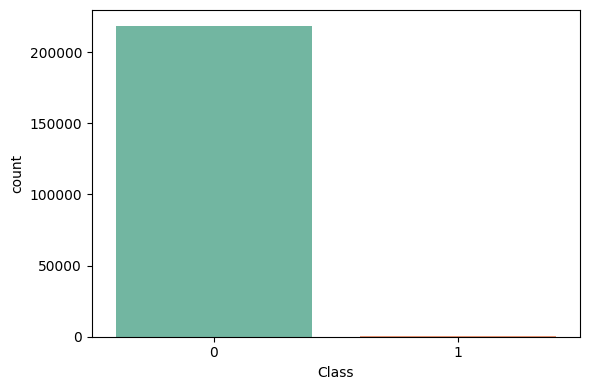

In [420]:
fig, ax = ply.subplots(figsize=(6,4))

ax = sns.countplot(x='Class', data = train)
plt.tight_layout()

#### We can here once again see,

The severe class imblance in the data set. This will obviously cause issues and difficulties when attempting to produce a model which wants to predict the rarer class: fraudulent transactions.

In [421]:
train['Time'].describe()

count    219129.000000
mean      62377.415376
std       25620.348569
min           0.000000
25%       47933.000000
50%       63189.000000
75%       77519.000000
max      120580.000000
Name: Time, dtype: float64

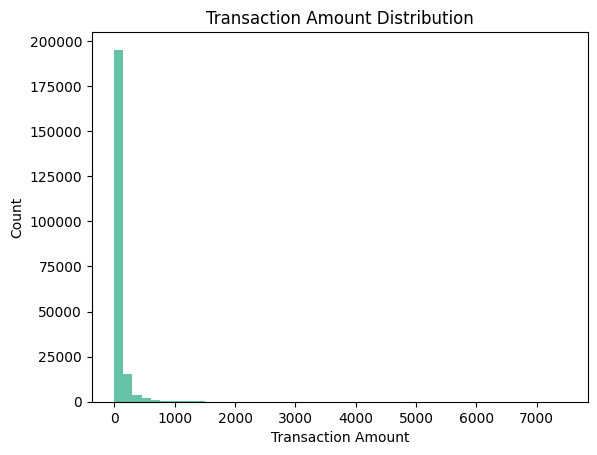

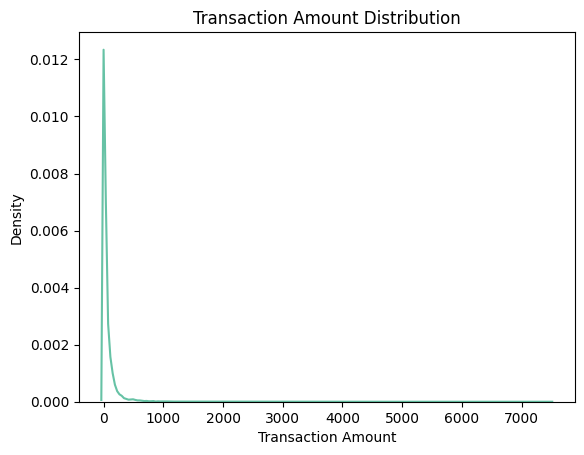

In [422]:
## Look at amount column:

plt.hist(train['Amount'], bins=50)
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.title('Transaction Amount Distribution')
plt.show()

sns.kdeplot(train['Amount'])
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.title('Transaction Amount Distribution')
plt.show()


-------------------------------------------------------------------------------------------------------

#### Some large outliers - maybe remove those that are of Class = 0 since we can afford to drop these (we have so many) 

In [423]:
train['Amount'].describe()
## max at 7000+

count    219129.000000
mean         66.359803
std         150.795017
min           0.000000
25%           5.990000
50%          21.900000
75%          68.930000
max        7475.000000
Name: Amount, dtype: float64

In [424]:
# ## where does 95% of data for Amount lie in?:
q = train['Amount'].quantile(0.95)
print(q)
# ~ 254
p = test['Amount'].quantile(0.95)
print(p)
# ~ 251

253.98599999999976
250.5879999999993


In [425]:
## how many fraud/non fraud observations lie beyond this threshold? (want to remove if  = 0)
train_amount_filtered = train[train['Amount'] > q]
class_counts = train_amount_filtered['Class'].value_counts()

print(class_counts)

# 0    10914
# 1       43
# Name: Class, dtype: int64

##     NOTE:

## We can not do this for test set since there is no Class known!

## Would like to remove those Class = 0 observations since we have wayyy enough of them....

0    10914
1       43
Name: Class, dtype: int64


In [426]:
## okay, so we want to remove Class = 0 observation outliers but leave in Class = 1 outliers (since we have so few of them)     
train = train.loc[(train['Class'] == 1) | ((train['Class'] == 0) & (train['Amount'] <= q))]

train['Amount'].describe()

## max is still large, what class is this from?:
train.loc[train['Amount']==4471.96]['Class']

## Ahhh corresponds to 1, good!

# 89026    1
# Name: Class, dtype: int64

89026    1
Name: Class, dtype: int64

In [427]:
train

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,0.108782,-1.070243,-0.234910,-1.099360,0.502467,0.169318,0.065688,-0.306957,-0.323800,0.103348,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,0.908773,0.836798,-0.056580,-0.120990,-0.144028,-0.039582,1.653057,-0.253599,-0.814354,0.716784,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,-0.818383,-0.376512,-0.226546,-0.552869,-0.886466,-0.180890,0.230286,0.590579,-0.321590,-0.433959,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,-0.007527,0.637441,0.676960,-1.504823,0.554039,-0.824356,-0.527267,-0.095838,-0.312519,0.642659,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,-0.097495,1.338869,1.391399,-0.128167,-0.081836,0.100548,-0.338937,0.090864,-0.423645,-0.731939,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219124,219124,120580.0,1.891079,-1.272908,-3.783908,-1.388939,2.012789,2.666080,0.151740,0.401934,-1.102824,0.858158,-0.280639,0.007976,-0.124950,0.914374,-0.073169,-2.309929,-0.041423,1.190526,-0.281848,-0.195703,-0.181369,-0.456538,-0.069571,0.756765,0.244479,-0.147566,-0.054725,-0.044588,198.65,0
219125,219125,120580.0,0.139724,0.948649,-2.913655,-2.184829,1.883716,-1.056824,1.725624,0.018089,-0.823494,-0.257933,-0.457534,0.516146,-0.071240,1.310799,-1.892909,-0.318780,-0.917395,0.098397,-0.195558,-0.116538,0.491469,1.478823,-0.085398,-0.091409,-1.053488,0.467570,0.358918,0.294735,24.00,0
219126,219126,120580.0,2.058343,-0.038993,-1.928553,0.330117,0.270127,-0.735664,-0.173878,0.144823,0.849289,-0.136498,0.179926,-1.769641,-3.937694,0.031346,0.028100,0.883566,0.391801,1.007789,0.303376,-0.384830,-0.306640,-0.965783,0.307799,-0.021434,-0.343989,0.181065,-0.098387,-0.044064,1.79,0
219127,219127,120580.0,2.079227,-2.162389,-1.785833,-2.804889,0.552845,4.038013,-2.155900,1.023785,-0.865242,1.536193,-0.058879,-0.885949,-0.254718,-0.425730,0.665556,-0.336634,0.301966,0.391249,0.037770,-0.190984,0.109909,0.590401,0.286621,0.675660,-0.510736,-0.090044,0.056749,-0.017126,88.00,0


-------------------------------------------------------------------------------------------------------

#### Do a bit of rescaling (models fit badly if not (eg SVC sensitve to unscaled data...))

In [428]:
# Convert 'Amount' column to **NumPy array** with a single column
amount_array = train['Amount'].to_numpy().reshape(-1, 1)
amount_array_test = test['Amount'].to_numpy().reshape(-1, 1)

# Create a new RobustScaler object and fit it to the 'Amount' data
scaler = RobustScaler().fit(amount_array)
scaler_test = RobustScaler().fit(amount_array_test)

# Transform the 'Amount' data using the fitted scaler and assign the scaled data to a new column
train['Amount'] = scaler.transform(amount_array)
test['Amount'] = scaler_test.transform(amount_array_test)


# The resulting 'Amount' column in train_new will be robustly scaled meaning it will be centered around the median and         
# its scale will be robust to outliers in the data. This preprocessing step can help improve the performance of
# machine learning models that use the 'Amount' feature as input.
## See this by plotting train_new['Amount'] vs train['Amount']


C:\Users\Julia\AppData\Local\Temp\ipykernel_26232\1707557273.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Amount'] = scaler.transform(amount_array)


In [429]:
## Now do this for the time feature:

# create a MinMaxScaler object
scaler_train1 = MinMaxScaler()
scaler_test1 = MinMaxScaler()

# fit the scaler to the 'Time' column
scaler_train1.fit(train[['Time']])
scaler_test1.fit(test[['Time']])

# transform the 'Time' column using the fitted scaler and assign the scaled data to a new column
train['Time'] = scaler_train1.transform(train[['Time']])
test['Time'] = scaler_test1.transform(test[['Time']])

## Check time lies between 0 and 1: train_new

C:\Users\Julia\AppData\Local\Temp\ipykernel_26232\851555437.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Time'] = scaler_train1.transform(train[['Time']])


In [430]:
## Drop id column:
train = train.drop(['id'], axis = 1)

## Don't drop id here:
# test = test.drop(['id'], axis = 1)

In [431]:
## Separate out the explanatory variables and target:
X_train = train.drop(['Class'], axis=1)
y_train = train['Class']

In [432]:
## Check:
y_train

0         0
1         0
2         0
3         0
4         0
         ..
219124    0
219125    0
219126    0
219127    0
219128    0
Name: Class, Length: 208215, dtype: int64

-------------------------------------------------------------------------------------------------------

### Correlation of features:

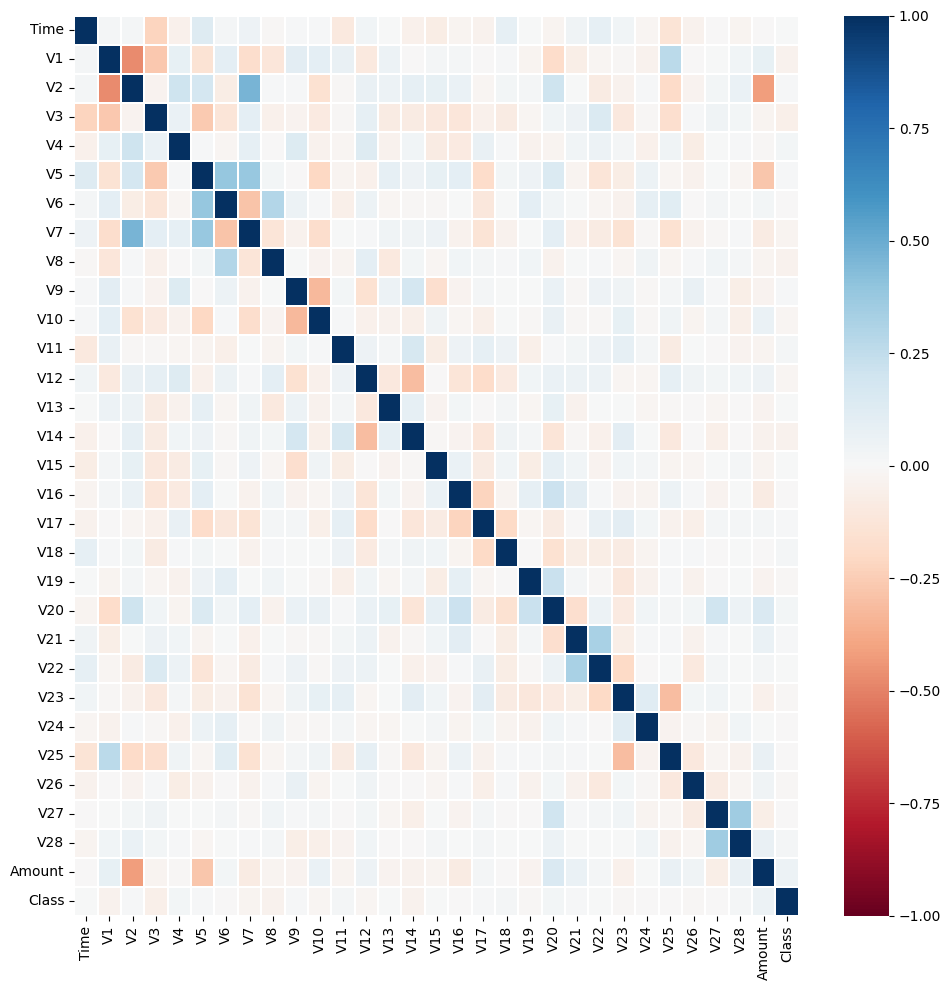

In [433]:
## Look at the correlations of the features:
cor = train.corr()
fig, ax = plt.subplots(figsize = (10,10))

sns.heatmap(cor, xticklabels = cor.columns, yticklabels=cor.columns, linewidths = 0.1, cmap = "RdBu", ax=ax, vmin = -1.0, vmax = 1.0)  
plt.tight_layout()

-------------------------------------------------------------------------------------------------------

#### Nothing too correlated with each other - good
**Amount appears to correlate significantly with V2. V1 and V2 also correlate well.**

-------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------

## Now we consider various models for three cases: 
 > #### - our original data 
 > #### - oversampled data (to accomodate the severe class imbalance)
 > #### - undersample the data (again to address skewed class feature)

## Method: **no under-/oversampling**

### Models:


-------------------------------------------------------------------------------------------------------

#### Logistic Regression:

In [434]:
## Train a Logistic regression model:

# Split into training set and validation set
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 314) 

# Train model
LogReg = LogisticRegression(class_weight = 'balanced', solver = 'liblinear').fit(X_train_new, y_train_new)

# Make predictions on validation set
pred_y = LogReg.predict(X_val)

# Print report
print(classification_report(y_val, pred_y))

## Output:
#               precision    recall  f1-score   support

#            0       1.00      0.81      0.89     51941
#            1       0.01      0.65      0.01       113

#     accuracy                           0.81     52054
#    macro avg       0.50      0.73      0.45     52054
# weighted avg       1.00      0.81      0.89     52054


              precision    recall  f1-score   support

           0       1.00      0.81      0.89     51941
           1       0.01      0.65      0.01       113

    accuracy                           0.81     52054
   macro avg       0.50      0.73      0.45     52054
weighted avg       1.00      0.81      0.89     52054



In [435]:
## AUPRC area under precision recall curve
## Calculate AUPRC

precision, recall, thresholds = precision_recall_curve(y_val, pred_y)
auprc = auc(recall, precision)

print("AUPRC:", auprc)

AUPRC: 0.3270303355047454


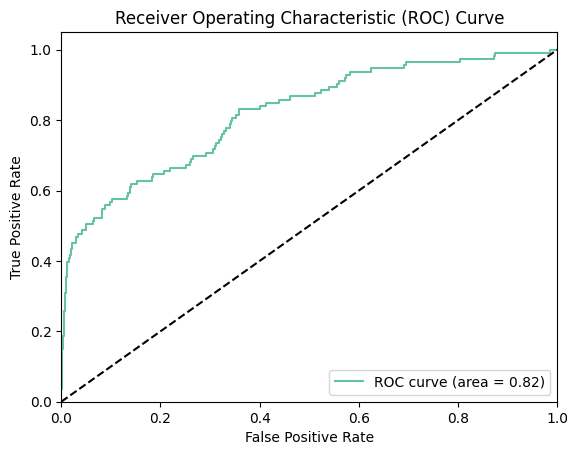

In [436]:
## Plot PR curve:

# Compute the predicted probabilities for the validation data
y_pred_prob1 = LogReg.predict_proba(X_val)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr_DecTree1, tpr_DecTree1, thresholds_DecTree1 = roc_curve(y_val, y_pred_prob1)

# Compute the area under the ROC curve
roc_auc_DecTree1 = roc_auc_score(y_val, y_pred_prob1)

# Plot the ROC curve
plt.plot(fpr_DecTree1, tpr_DecTree1, label='ROC curve (area = %0.2f)' % roc_auc_DecTree1)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

-------------------------------------------------------------------------------------------------------

#### Decision Tree:

In [437]:
## Now train a decision tree:

# Create model
DT = DecisionTreeClassifier(max_depth = 3, criterion = 'entropy', random_state = 314)

# Fit model to training set
DT.fit(X_train_new, y_train_new)

# Make predictions on validation set
pred_y_DT = DT.predict(X_val)

# Print report
print(classification_report(y_val, pred_y_DT))

## Output:
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00     51941
#            1       1.00      0.12      0.21       113

#     accuracy                           1.00     52054
#    macro avg       1.00      0.56      0.60     52054
# weighted avg       1.00      1.00      1.00     52054


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51941
           1       1.00      0.12      0.21       113

    accuracy                           1.00     52054
   macro avg       1.00      0.56      0.60     52054
weighted avg       1.00      1.00      1.00     52054



In [438]:
## AUPRC area under precision recall curve
## Calculate AUPRC

precision, recall, thresholds = precision_recall_curve(y_val, pred_y_DT)
auprc = auc(recall, precision)

print("AUPRC:", auprc)

AUPRC: 0.5584826648704834


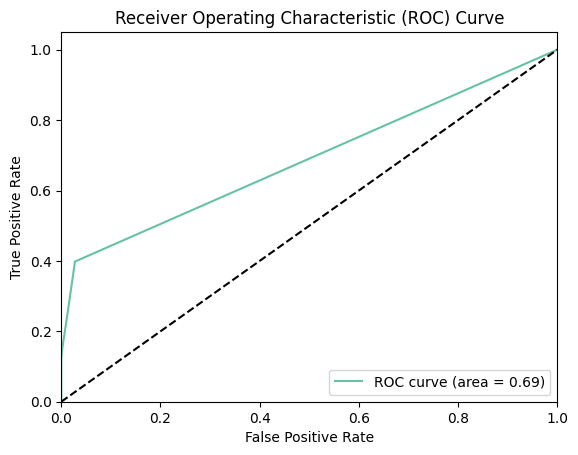

In [439]:
## Plot PR curve:

# Compute the predicted probabilities for the validation data
y_pred_prob2 = DT.predict_proba(X_val)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr_DecTree2, tpr_DecTree2, thresholds_DecTree2 = roc_curve(y_val, y_pred_prob2)

# Compute the area under the ROC curve
roc_auc_DecTree2 = roc_auc_score(y_val, y_pred_prob2)

# Plot the ROC curve
plt.plot(fpr_DecTree2, tpr_DecTree2, label='ROC curve (area = %0.2f)' % roc_auc_DecTree2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

-------------------------------------------------------------------------------------------------------

#### Random Forest:


In [440]:
## Train a random forest: [7 minutes]

# Create the random forest model with 100 estimators
RF = RandomForestClassifier(n_estimators=100, random_state=314)

# Train on training set
RF.fit(X_train_new, y_train_new)

# Evaluate the performance of the model on the validation set
y_pred_RF = RF.predict(X_val)

# Print report
print(classification_report(y_val, y_pred_RF))

## Output:
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00     51941
#            1       0.87      0.12      0.20       113

#     accuracy                           1.00     52054
#    macro avg       0.93      0.56      0.60     52054
# weighted avg       1.00      1.00      1.00     52054

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51941
           1       0.87      0.12      0.20       113

    accuracy                           1.00     52054
   macro avg       0.93      0.56      0.60     52054
weighted avg       1.00      1.00      1.00     52054



In [441]:
## AUPRC area under precision recall curve
## Calculate AUPRC

precision, recall, thresholds = precision_recall_curve(y_val, y_pred_RF)
auprc = auc(recall, precision)

print("AUPRC:", auprc)

AUPRC: 0.4918159982038167


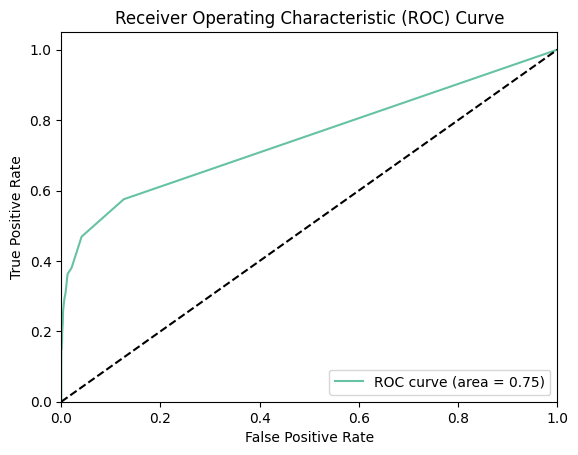

In [442]:
## Plot PR curve:

# Compute the predicted probabilities for the validation data
y_pred_prob3 = RF.predict_proba(X_val)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr_DecTree3, tpr_DecTree3, thresholds_DecTree3 = roc_curve(y_val, y_pred_prob3)

# Compute the area under the ROC curve
roc_auc_DecTree3 = roc_auc_score(y_val, y_pred_prob3)

# Plot the ROC curve
plt.plot(fpr_DecTree3, tpr_DecTree3, label='ROC curve (area = %0.2f)' % roc_auc_DecTree3)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

-------------------------------------------------------------------------------------------------------

#### AdaBoost:

In [443]:
## Train ada boost model with decision tree stumps [1 minute]

# Creat model (50 stumps) (only **decision trees**)
AdaBoost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1, min_samples_split=5), n_estimators=50, learning_rate=1, random_state=314)

# Fit model to training set
AdaBoost.fit(X_train_new, y_train_new)

# Make predictions on validation set
y_pred_AdaBoost = AdaBoost.predict(X_val)

# Print report
print(classification_report(y_val, y_pred_AdaBoost))

## Output:

#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00     51941
#            1       0.52      0.13      0.21       113

#     accuracy                           1.00     52054
#    macro avg       0.76      0.57      0.61     52054
# weighted avg       1.00      1.00      1.00     52054


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51941
           1       0.52      0.13      0.21       113

    accuracy                           1.00     52054
   macro avg       0.76      0.57      0.61     52054
weighted avg       1.00      1.00      1.00     52054



In [444]:
## AUPRC area under precision recall curve
## Calculate AUPRC

precision, recall, thresholds = precision_recall_curve(y_val, y_pred_AdaBoost)
auprc = auc(recall, precision)

print("AUPRC:", auprc)

AUPRC: 0.32593370122824616


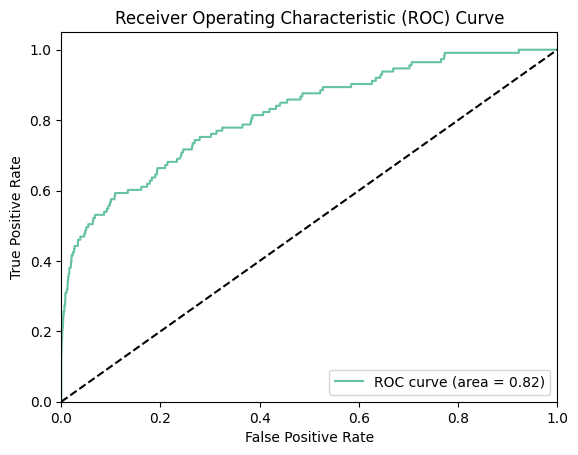

In [445]:
## Plot PR curve:

# Compute the predicted probabilities for the validation data
y_pred_prob4 = AdaBoost.predict_proba(X_val)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr_DecTree4, tpr_DecTree4, thresholds_DecTree4 = roc_curve(y_val, y_pred_prob4)

# Compute the area under the ROC curve
roc_auc_DecTree4 = roc_auc_score(y_val, y_pred_prob4)

# Plot the ROC curve
plt.plot(fpr_DecTree4, tpr_DecTree4, label='ROC curve (area = %0.2f)' % roc_auc_DecTree4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

-------------------------------------------------------------------------------------------------------

#### Gradient Boost:


In [446]:
## Train a gradient boost model: [5 minutes]

# Create the gradient boosting model with 100 estimators
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=314, loss='deviance')

# Fit model to training set
GB.fit(X_train_new, y_train_new)

# Make predictions on the validation set
y_pred_GB = GB.predict(X_val)

# Print report
print(classification_report(y_val, y_pred_GB))

## Output:

#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00     51941
#            1       0.52      0.13      0.21       113

#     accuracy                           1.00     52054
#    macro avg       0.76      0.57      0.61     52054
# weighted avg       1.00      1.00      1.00     52054


C:\Users\Julia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51941
           1       0.52      0.13      0.21       113

    accuracy                           1.00     52054
   macro avg       0.76      0.57      0.61     52054
weighted avg       1.00      1.00      1.00     52054



In [447]:
## AUPRC area under precision recall curve
## Calculate AUPRC

precision, recall, thresholds = precision_recall_curve(y_val, y_pred_GB)
auprc = auc(recall, precision)

print("AUPRC:", auprc)

AUPRC: 0.32593370122824616


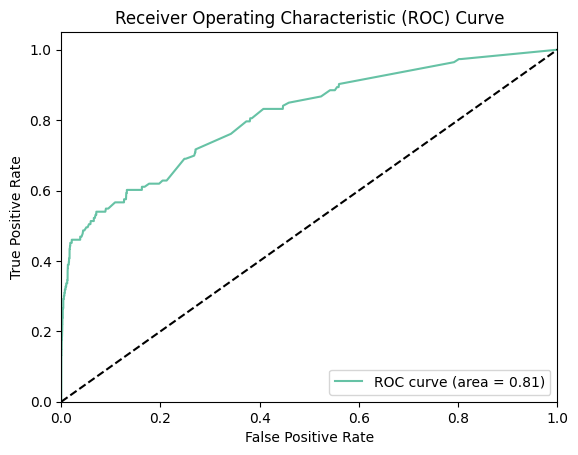

In [448]:
## Plot PR curve:

# Compute the predicted probabilities for the validation data
y_pred_prob5 = GB.predict_proba(X_val)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr_DecTree5, tpr_DecTree5, thresholds_DecTree5 = roc_curve(y_val, y_pred_prob5)

# Compute the area under the ROC curve
roc_auc_DecTree5 = roc_auc_score(y_val, y_pred_prob5)

# Plot the ROC curve
plt.plot(fpr_DecTree5, tpr_DecTree5, label='ROC curve (area = %0.2f)' % roc_auc_DecTree5)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

-------------------------------------------------------------------------------------------------------

#### Linear SVM:

In [449]:
## Lastly train a linear support vector machine model: [2 minutes]

# Create the linear SVM model
svm = LinearSVC(random_state=314)

# Fit the model to training set
svm.fit(X_train_new, y_train_new)

# Make predictions on validation set
y_pred_svm = svm.predict(X_val)

# Print report
print(classification_report(y_val, y_pred_svm))

## Output:
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00     51941
#            1       0.50      0.02      0.03       113

#     accuracy                           1.00     52054
#    macro avg       0.75      0.51      0.52     52054
# weighted avg       1.00      1.00      1.00     52054

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51941
           1       0.50      0.02      0.03       113

    accuracy                           1.00     52054
   macro avg       0.75      0.51      0.52     52054
weighted avg       1.00      1.00      1.00     52054



C:\Users\Julia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [450]:
## AUPRC area under precision recall curve
## Calculate AUPRC

precision, recall, thresholds = precision_recall_curve(y_val, y_pred_svm)
auprc = auc(recall, precision)

print("AUPRC:", auprc)

AUPRC: 0.2599157580062365


### Overall, 

**we can see, that due the class imbalance, we obtain very poor scores (F1) for the class 1 (fraudulent transactions). Let us consider to methods of dealing with this.**



-------------------------------------------------------------------------------------------------------

# Method: **oversampling**


Oversample the minority class and create models based on this new data.
   - **Disadvantages:** Clearly results in a different data set -> loss of info, i.e., may not be truely representative. Increased variance. Longer running times 
   - **Advantages:** Clearly improved model performance. More data available. Less extreme skewness of data.

In [451]:
## Implement oversampling:

# Split the data into predictor and target variables
X_train = train.drop(['Class'], axis=1)
y_train = train['Class']

# Use SMOTE to oversample the **minority class**
oversample = SMOTE(random_state = 314)
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train, y_train)

# Convert resampled data back to a pandas DataFrame
train_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)

# Print the lengths of the resampled classes
print(train_resampled['Class'].value_counts())

# Split the resampled data into predictor and target variables
X_train1 = train_resampled.drop(['Class'], axis=1)
y_train1 = train_resampled['Class']

## Output:
# 0    207746
# 1    207746
# Name: Class, dtype: int64

0    207746
1    207746
Name: Class, dtype: int64


In [452]:
X_train1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,0.108782,-1.070243,-0.234910,-1.099360,0.502467,0.169318,0.065688,-0.306957,-0.323800,0.103348,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,-0.346644
1,0.000000,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,0.908773,0.836798,-0.056580,-0.120990,-0.144028,-0.039582,1.653057,-0.253599,-0.814354,0.716784,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,1.235532
2,0.000000,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,-0.818383,-0.376512,-0.226546,-0.552869,-0.886466,-0.180890,0.230286,0.590579,-0.321590,-0.433959,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,-0.332948
3,0.000000,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,-0.007527,0.637441,0.676960,-1.504823,0.554039,-0.824356,-0.527267,-0.095838,-0.312519,0.642659,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,-0.365548
4,0.000000,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,-0.097495,1.338869,1.391399,-0.128167,-0.081836,0.100548,-0.338937,0.090864,-0.423645,-0.731939,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,-0.365548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415487,0.642925,-1.024050,2.338960,-2.464513,0.855290,1.236158,-0.561552,0.173337,0.272127,0.139988,1.213377,1.315428,-1.104549,-1.575141,-1.387945,1.158221,0.635429,2.079170,1.930119,0.377007,0.780266,-0.173160,-0.009538,-0.026578,-0.910363,-0.035819,-0.223552,0.645052,0.284941,-0.357963
415488,0.645239,1.182025,0.353748,-0.020181,1.052745,-0.274981,-0.926541,0.045492,-0.113065,0.356143,-0.748494,0.162382,0.233745,-0.445153,-1.418111,-0.239550,0.111198,1.162612,0.199963,-0.161462,-0.099951,-0.073800,0.043779,-0.119578,0.397870,0.615258,0.398160,0.007141,0.047791,-0.147377
415489,0.078340,-0.482835,1.540814,0.374545,0.322481,-0.508347,1.305808,-2.780616,-7.071046,-1.034600,-1.260304,1.246570,1.869171,-0.024521,1.028802,0.259827,0.881223,-0.431972,0.146294,-0.618903,1.371928,-0.735635,1.132731,0.272931,0.603165,0.800838,0.007279,0.124651,0.293458,-0.379473
415490,0.054755,-0.785177,0.734335,1.167333,0.494934,0.604147,-0.034722,0.658060,-0.068676,0.655083,-0.312148,1.956875,-2.047138,1.456845,1.664648,-0.277594,-0.090464,0.233041,0.634714,-0.098013,-0.108776,-0.030915,0.392014,0.066707,-0.269605,0.020182,-0.360690,0.011282,0.067788,0.421023


### Models:

-------------------------------------------------------------------------------------------------------

#### Logistic Regression:

In [453]:
## Logistic regression with oversampling:

# Split into training and validation set
X_train1_new, X_val1, y_train1_new, y_val1 = train_test_split(X_train1, y_train1, test_size = 0.25, random_state = 314)    

# Create and fit logic regression model to training set
LogReg1 = LogisticRegression(class_weight = 'balanced', solver = 'liblinear').fit(X_train1_new, y_train1_new)

# Use model to predict validation set
pred_y1 = LogReg1.predict(X_val1)

# Print report
print(classification_report(y_val1, pred_y1))

## Output:
#               precision    recall  f1-score   support

#            0       0.71      0.78      0.75     51785
#            1       0.76      0.69      0.72     52088

#     accuracy                           0.73    103873
#    macro avg       0.74      0.73      0.73    103873
# weighted avg       0.74      0.73      0.73    103873


              precision    recall  f1-score   support

           0       0.71      0.78      0.75     51785
           1       0.76      0.69      0.72     52088

    accuracy                           0.73    103873
   macro avg       0.74      0.73      0.73    103873
weighted avg       0.74      0.73      0.73    103873



In [454]:
## AUPRC area under precision recall curve
## Calculate AUPRC

precision, recall, thresholds = precision_recall_curve(y_val1, pred_y1)
auprc = auc(recall, precision)

print("AUPRC:", auprc)

AUPRC: 0.8022854265395798


-------------------------------------------------------------------------------------------------------

#### Decision Tree:

In [455]:
## Decision tree with oversampling

# Create decision tree model
DT1 = DecisionTreeClassifier(max_depth = 3, criterion = 'entropy', random_state = 314)

# Fit model to training set
DT1.fit(X_train1_new, y_train1_new)

# Make predictions on validation set
pred_y1_DT1 = DT1.predict(X_val1)

# Print performance report
print(classification_report(y_val1, pred_y1_DT1))

## Output:
#               precision    recall  f1-score   support

#            0       0.62      0.91      0.74     51785
#            1       0.83      0.45      0.58     52088

#     accuracy                           0.68    103873
#    macro avg       0.73      0.68      0.66    103873
# weighted avg       0.73      0.68      0.66    103873


              precision    recall  f1-score   support

           0       0.62      0.91      0.74     51785
           1       0.83      0.45      0.58     52088

    accuracy                           0.68    103873
   macro avg       0.73      0.68      0.66    103873
weighted avg       0.73      0.68      0.66    103873



In [456]:
## AUPRC area under precision recall curve
## Calculate AUPRC

precision, recall, thresholds = precision_recall_curve(y_val1, pred_y1_DT1)
auprc = auc(recall, precision)

print("AUPRC:", auprc)

AUPRC: 0.778335686319509


-------------------------------------------------------------------------------------------------------

#### Random Forest:


In [457]:
## Random forest with oversampling [8 minutes]

# Create model with 100 estimators 
RF1 = RandomForestClassifier(n_estimators=100, random_state=314)

# Fit model to training set
RF1.fit(X_train1_new, y_train1_new)

# Evaluate the performance of the model on the validation set
y_pred_RF1 = RF1.predict(X_val1)
print(classification_report(y_val1, y_pred_RF1))

## Output: 100 estimators - might be overfitting 
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00     51785
#            1       1.00      1.00      1.00     52088

#     accuracy                           1.00    103873
#    macro avg       1.00      1.00      1.00    103873
# weighted avg       1.00      1.00      1.00    103873


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51785
           1       1.00      1.00      1.00     52088

    accuracy                           1.00    103873
   macro avg       1.00      1.00      1.00    103873
weighted avg       1.00      1.00      1.00    103873



In [458]:
## AUPRC area under precision recall curve
## Calculate AUPRC

precision, recall, thresholds = precision_recall_curve(y_val1, y_pred_RF1)
auprc = auc(recall, precision)

print("AUPRC:", auprc)

AUPRC: 0.9995300842012391


-------------------------------------------------------------------------------------------------------

#### AdaBoost:

In [459]:
## AdaBoost with oversampling [2 minutes]

# Create model (50 stumps) (only **decision trees**)
AdaBoost1 = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1, min_samples_split=5), n_estimators=50, learning_rate=1, random_state=314)   

# Fit model to training set
AdaBoost1.fit(X_train1_new, y_train1_new)

# Eval. performance:
y_pred_AdaBoost1 = AdaBoost1.predict(X_val1)
print(classification_report(y_val1, y_pred_AdaBoost1))

## Output:
#               precision    recall  f1-score   support

#            0       0.78      0.82      0.80     51785
#            1       0.81      0.76      0.79     52088

#     accuracy                           0.79    103873
#    macro avg       0.79      0.79      0.79    103873
# weighted avg       0.79      0.79      0.79    103873


              precision    recall  f1-score   support

           0       0.78      0.82      0.80     51785
           1       0.81      0.76      0.79     52088

    accuracy                           0.79    103873
   macro avg       0.79      0.79      0.79    103873
weighted avg       0.79      0.79      0.79    103873



In [460]:
## AUPRC area under precision recall curve
## Calculate AUPRC

precision, recall, thresholds = precision_recall_curve(y_val1, y_pred_AdaBoost1)
auprc = auc(recall, precision)

print("AUPRC:", auprc)

AUPRC: 0.8454109452130171


-------------------------------------------------------------------------------------------------------

#### Gradient Boosting: (requires some time to run...)

In [461]:
## Gradient boosting with oversampling [11 minutes]

# Train the model with 100 estimators
GB1 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=314, loss='deviance')

# Fit model to training set
GB1.fit(X_train1_new, y_train1_new)

# Evaluate the performance of the model on the validation set
y_pred_GB1 = GB1.predict(X_val1)
print(classification_report(y_val1, y_pred_GB1))

## Output:
#               precision    recall  f1-score   support

#            0       0.83      0.86      0.85     51785
#            1       0.86      0.83      0.84     52088

#     accuracy                           0.85    103873
#    macro avg       0.85      0.85      0.85    103873
# weighted avg       0.85      0.85      0.85    103873

C:\Users\Julia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.83      0.86      0.85     51785
           1       0.86      0.83      0.84     52088

    accuracy                           0.85    103873
   macro avg       0.85      0.85      0.85    103873
weighted avg       0.85      0.85      0.85    103873



In [462]:
## AUPRC area under precision recall curve
## Calculate AUPRC

precision, recall, thresholds = precision_recall_curve(y_val1, y_pred_GB1)
auprc = auc(recall, precision)

print("AUPRC:", auprc)

AUPRC: 0.8866062870846189


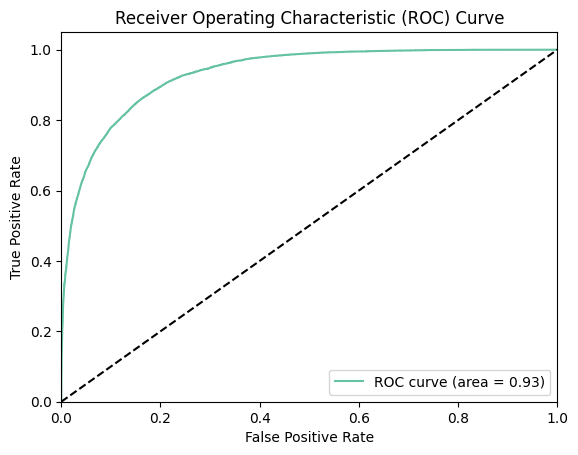

In [463]:
## Plot PR curve:

# Compute the predicted probabilities for the validation data
y_pred_prob6 = GB1.predict_proba(X_val1)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr_DecTree6, tpr_DecTree6, thresholds_DecTree6 = roc_curve(y_val1, y_pred_prob6)

# Compute the area under the ROC curve
roc_auc_DecTree6 = roc_auc_score(y_val1, y_pred_prob6)

# Plot the ROC curve
plt.plot(fpr_DecTree6, tpr_DecTree6, label='ROC curve (area = %0.2f)' % roc_auc_DecTree6)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

>Our best model so far - can we increase ROC area under the curve by using **Grid search:**?

> Takes too long to run (did not get to complete, but this could potentially increase the AUPRC)

In [464]:
# GB1_2 = GradientBoostingClassifier(random_state=314)

# param_grid_GB = {
#     'learning_rate': [0.1, 0.5],
#     'n_estimators': [100, 200],
#     'max_depth': [3, 5],
#     'subsample': [0.75, 1.0],
# }

# grid_search = GridSearchCV(GB1_2, param_grid=param_grid_GB, cv=5, scoring='accuracy')
# grid_search.fit(X_train1_new, y_train1_new)

# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

-------------------------------------------------------------------------------------------------------

#### Linear SVM:

In [465]:
## Linear SVM with oversampling [4 minutes]

# Create the linear SVM model
svm1 = LinearSVC(random_state=314)

# Fit to training set
svm1.fit(X_train1_new, y_train1_new)

# Evaluate the performance of the model on the validation set
y_pred_svm1 = svm1.predict(X_val1)
print(classification_report(y_val1, y_pred_svm1))

## Output:
#               precision    recall  f1-score   support

#            0       0.71      0.78      0.75     51785
#            1       0.76      0.69      0.72     52088

#     accuracy                           0.73    103873
#    macro avg       0.74      0.73      0.73    103873
# weighted avg       0.74      0.73      0.73    103873

              precision    recall  f1-score   support

           0       0.71      0.78      0.75     51785
           1       0.76      0.69      0.72     52088

    accuracy                           0.73    103873
   macro avg       0.74      0.73      0.73    103873
weighted avg       0.74      0.73      0.73    103873



C:\Users\Julia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [466]:
## AUPRC area under precision recall curve
## Calculate AUPRC

precision, recall, thresholds = precision_recall_curve(y_val1, y_pred_svm1)
auprc = auc(recall, precision)

print("AUPRC:", auprc)

AUPRC: 0.8023604117937049


#### Much better F1 values,
(although one model seemed to be overfitting). What about **undersampling**? How do the results compare?
- **Advantages:** firstly reduces the size of the data which might help with comp. costs. It can improve the performance of classifiers in terms of less extreme imbalance.
- **Disadvantages:** Obviously will lead to loss of information, much more than oversampling. Also can lead to larger variance. If minority class has very few samples, we might lose them in the process : this is why **we keep all observations from the fraudulent class** and **randomly sample from the over representative class of non-fraudulent classes**:

-------------------------------------------------------------------------------------------------------

# Method: **undersampling**

 Let us reduce the data points of the majority class to balance it with the minority class:

In [467]:
## Implement undersampling manually (so we do not lose class 1 observations)

NF = train[train['Class']== 0].sample(2500, random_state = 314)   ## Sample 2500 of class 0 (non-fradulent) randomly
F = train[train['Class']== 1]                                     ## Keep all observations in Class 1 (fraudulent) since we have so few of them     

# Check number of instances in each class:
print('No. non-fraud:', len(NF), ', No. fraud:', len(F))
# output: No. non-fraud: 2500, No. fraud: 469

# Combine both sets into one
train2 = NF.append(F).sample(frac=1, random_state=314).reset_index(drop=True)

# Split predictor and target variables (keep in dataframe form)
X_train2 = train2.drop(['Class'], axis = 1)
y_train2 = train2['Class']

No. non-fraud: 2500 , No. fraud: 469


C:\Users\Julia\AppData\Local\Temp\ipykernel_26232\1671914787.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train2 = NF.append(F).sample(frac=1, random_state=314).reset_index(drop=True)


In [468]:
## Check: 
X_train2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.292519,-0.352818,1.085899,1.283558,0.063359,0.019965,-1.007034,0.691217,-0.048706,-0.365737,-0.531848,-0.124955,-0.306696,-0.337648,-0.360712,0.923812,0.383314,0.140793,-0.114519,-0.088360,0.133913,-0.266243,-0.700842,-0.005734,0.311509,-0.159966,0.076366,0.245707,0.098972,-0.250000
1,0.662838,-1.471813,0.403317,0.924362,-1.093633,-0.566350,-0.783901,-0.147905,0.547109,-1.620099,0.038131,0.298045,0.334527,-0.854172,0.559817,-1.640825,-1.451819,0.155960,1.010915,-0.842045,-0.659818,-0.184835,-0.061201,-0.312958,0.339829,0.182715,0.590541,0.180569,-0.017860,-0.191937
2,0.568104,-2.011575,1.377865,0.381223,-1.959263,-0.818693,-1.069764,-0.619859,1.226450,0.639164,-1.363527,-0.572435,0.639882,-0.097558,0.787977,1.457789,0.161860,0.336512,-0.716591,-0.527162,-0.160727,-0.077151,-0.390527,0.053628,0.109970,-0.361489,-0.245988,-0.004559,0.027717,-0.310571
3,0.648773,-1.228027,0.906938,1.042228,1.092700,-0.556029,-0.974210,0.091858,0.542204,-0.547497,-0.302401,-0.661436,-0.636131,-1.277838,0.968152,1.408827,-0.193358,0.262524,0.349524,0.414353,-0.016958,0.223468,0.403828,0.192945,0.683351,-0.262536,-0.301246,0.225140,0.066510,0.483025
4,0.674357,1.451595,-0.990058,-0.166869,-1.461338,-0.959365,-0.599478,-0.697825,-0.124536,-1.919290,1.590741,-0.633684,-1.504979,-0.973915,0.226095,0.746793,-0.900829,0.943846,-0.827145,-0.257401,-0.315822,-0.391736,-0.907171,0.141099,-0.376030,0.227028,-0.397910,0.007818,0.008024,0.463927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964,0.996127,-0.926190,1.923160,1.131068,4.065683,0.383621,1.035083,0.087824,0.755568,-2.314729,1.551398,0.271435,-0.331700,-0.691279,0.844167,-0.173830,0.038965,0.276445,0.753730,1.616867,0.370117,0.064653,0.223380,-0.336824,0.715908,0.495979,0.342423,0.172919,0.012851,-0.119985
2965,0.776406,-5.751825,4.979288,-0.067166,-0.356746,-1.452657,0.093375,-0.382527,0.736469,5.171416,6.817455,2.120916,-2.079917,-0.412712,1.445616,-0.566288,-0.764690,0.460530,0.772950,0.038097,2.783513,-1.078188,-1.422915,-0.023822,-0.093670,1.247098,-0.341111,1.088049,0.536909,0.000965
2966,0.719837,-0.971066,0.726691,1.061359,-0.491740,0.070156,-0.179969,0.492701,-0.180108,0.876912,0.018934,-0.901094,0.066469,-0.079642,-0.558849,0.146925,-0.223516,-0.501869,-0.053317,-0.342828,0.054580,0.098681,0.742661,-0.064025,0.489827,-0.089569,-0.240089,-0.134967,0.086526,-0.163002
2967,0.239078,1.227338,-1.167526,1.013348,-0.957703,-1.505836,0.470567,-1.637539,0.569181,0.022780,0.834410,0.849058,-1.590076,-2.875166,0.230128,1.290109,1.550027,0.244502,-0.175868,-0.007814,-0.086396,0.485836,1.151669,-0.143536,-0.307739,0.273547,-0.036079,0.041265,0.003939,0.386574


### Looking at Models:

-------------------------------------------------------------------------------------------------------

#### Logistic Regression:

In [469]:
## Logistic regression with undersampling

# Split into training and validation sets
X_train2_new, X_val2, y_train2_new, y_val2 = train_test_split(X_train2, y_train2, test_size = 0.25, random_state = 314)    

# Create & fit logistic regression model to training set
LogReg2 = LogisticRegression(class_weight = 'balanced', solver = 'liblinear').fit(X_train2_new, y_train2_new)

# Make predictions on validation set
pred_y2 = LogReg2.predict(X_val2)

# Print performance report
print(classification_report(y_val2, pred_y2))

## Output:
#               precision    recall  f1-score   support

#            0       0.93      0.81      0.87       626
#            1       0.40      0.67      0.50       117

#     accuracy                           0.79       743
#    macro avg       0.66      0.74      0.68       743
# weighted avg       0.84      0.79      0.81       743


              precision    recall  f1-score   support

           0       0.93      0.81      0.87       626
           1       0.40      0.67      0.50       117

    accuracy                           0.79       743
   macro avg       0.66      0.74      0.68       743
weighted avg       0.84      0.79      0.81       743



In [470]:
## AUPRC area under precision recall curve
## Calculate AUPRC

precision, recall, thresholds = precision_recall_curve(y_val2, pred_y2)
auprc = auc(recall, precision)

print("AUPRC:", auprc)

AUPRC: 0.5575478293742158


-------------------------------------------------------------------------------------------------------

#### Decision Tree:

In [471]:
## Decision tree with undersampling

# Create decision tree model
DT2 = DecisionTreeClassifier(max_depth = 3, criterion = 'entropy', random_state = 314)

# Fit model to training set
DT2.fit(X_train2_new, y_train2_new)

# Make predictions on validation set
pred_y2_DT2 = DT2.predict(X_val2)

# Print performance report
print(classification_report(y_val2, pred_y2_DT2))

## Output:
#               precision    recall  f1-score   support

#            0       0.89      0.95      0.92       626
#            1       0.61      0.39      0.48       117

#     accuracy                           0.86       743
#    macro avg       0.75      0.67      0.70       743
# weighted avg       0.85      0.86      0.85       743

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       626
           1       0.61      0.39      0.48       117

    accuracy                           0.86       743
   macro avg       0.75      0.67      0.70       743
weighted avg       0.85      0.86      0.85       743



In [472]:
## AUPRC area under precision recall curve
## Calculate AUPRC

precision, recall, thresholds = precision_recall_curve(y_val2, pred_y2_DT2)
auprc = auc(recall, precision)

print("AUPRC:", auprc)

AUPRC: 0.5469920487452541


-------------------------------------------------------------------------------------------------------

#### Random Forest

In [473]:
## Random forest with undersampling

# Create random forest model with 100 estimators
RF2 = RandomForestClassifier(n_estimators=100, random_state=314)

# Fit model to training data
RF2.fit(X_train2_new, y_train2_new)

# Evaluate the performance of the model on the validation set
y_pred_RF2 = RF2.predict(X_val2)
print(classification_report(y_val2, y_pred_RF2))

## Output:
#               precision    recall  f1-score   support

#            0       0.90      0.98      0.94       626
#            1       0.77      0.44      0.56       117

#     accuracy                           0.89       743
#    macro avg       0.84      0.71      0.75       743
# weighted avg       0.88      0.89      0.88       743


              precision    recall  f1-score   support

           0       0.90      0.98      0.94       626
           1       0.77      0.44      0.56       117

    accuracy                           0.89       743
   macro avg       0.84      0.71      0.75       743
weighted avg       0.88      0.89      0.88       743



In [474]:
## AUPRC area under precision recall curve
## Calculate AUPRC

precision, recall, thresholds = precision_recall_curve(y_val2, y_pred_RF2)
auprc = auc(recall, precision)

print("AUPRC:", auprc)

AUPRC: 0.6487268899785723


-------------------------------------------------------------------------------------------------------

#### Attempt grid search here (for random forest)

- we are using 5-fold cross-validation (cv=5) and evaluating performance based on accuracy (scoring='accuracy'). The GridSearchCV function will fit the random forest model for all 81 combinations of hyperparameters and select the best set of hyperparameters based on cross-validation performance.

In [475]:
## GridSearchCV for best fitting hyperparameters for random forest with undersampling [9 minutes]
## Total of 3 x 3 x 3 x 3 = 81 possible combinations of hyperparameters.

# Create model
RF3 = RandomForestClassifier(random_state=314)

# Define hyperparameters search grid
param_grid2 = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Combine model with GridSearchCV
# grid_search = GridSearchCV(RF3, param_grid=param_grid2, cv=5, scoring='accuracy')
grid_search = GridSearchCV(RF3, param_grid=param_grid2, scoring='accuracy')

# Fit model to training set (searching for best hyperparameters)
grid_search.fit(X_train2_new, y_train2_new)

# Print results
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best score:  0.8953242303622714


-------------------------------------------------------------------------------------------------------

#### Apply the best hyperparameters:

In [476]:
## Check random forest with undersampling and best hyperparameters:

# Create the random forest model with 100 estimators
RF3_2 = RandomForestClassifier(max_depth= 20, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200, random_state=314)

# Fit the model to training set
RF3_2.fit(X_train2_new, y_train2_new)

# Evaluate the performance of the model on the validation set
y_pred_RF3_2 = RF3_2.predict(X_val2)
print(classification_report(y_val2, y_pred_RF3_2))

## Output:
#               precision    recall  f1-score   support

#            0       0.90      0.98      0.94       626
#            1       0.77      0.44      0.56       117

#     accuracy                           0.89       743
#    macro avg       0.84      0.71      0.75       743
# weighted avg       0.88      0.89      0.88       743


              precision    recall  f1-score   support

           0       0.90      0.98      0.94       626
           1       0.77      0.44      0.56       117

    accuracy                           0.89       743
   macro avg       0.84      0.71      0.75       743
weighted avg       0.88      0.89      0.88       743



In [477]:
## AUPRC area under precision recall curve
## Calculate AUPRC

precision, recall, thresholds = precision_recall_curve(y_val2, y_pred_RF3_2)
auprc = auc(recall, precision)

print("AUPRC:", auprc)

AUPRC: 0.6487268899785723


>**New AUPRC: 0.713, compared to AUPRC: 0.687. Slightly worse....**

-------------------------------------------------------------------------------------------------------

#### AdaBoost:

In [478]:
## AdaBoost with undersampling

# Create model (50 stumps) (only **decision trees**)
AdaBoost2 = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1, min_samples_split=5), n_estimators=50, learning_rate=1, random_state=314)   

# Fit model to training set
AdaBoost2.fit(X_train2_new, y_train2_new)

## Eval. performance:
y_pred_AdaBoost2 = AdaBoost2.predict(X_val2)
print(classification_report(y_val2, y_pred_AdaBoost2))

## Output:
#               precision    recall  f1-score   support

#            0       0.90      0.96      0.93       626
#            1       0.68      0.46      0.55       117

#     accuracy                           0.88       743
#    macro avg       0.79      0.71      0.74       743
# weighted avg       0.87      0.88      0.87       743

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       626
           1       0.68      0.46      0.55       117

    accuracy                           0.88       743
   macro avg       0.79      0.71      0.74       743
weighted avg       0.87      0.88      0.87       743



In [479]:
## AUPRC area under precision recall curve
## Calculate AUPRC

precision, recall, thresholds = precision_recall_curve(y_val2, y_pred_AdaBoost2)
auprc = auc(recall, precision)

print("AUPRC:", auprc)

AUPRC: 0.6106649239051661


-------------------------------------------------------------------------------------------------------

#### Gradient Boosting

In [480]:
## Gradient boosting with undersampling

# Create the gradient boosting model with 100 estimators
GB2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=314, loss='log_loss')

# Fit model to training set
GB2.fit(X_train2_new, y_train2_new)

# Evaluate the performance of the model on the validation set
y_pred_GB2 = GB2.predict(X_val2)
print(classification_report(y_val2, y_pred_GB2))

## Output:
#               precision    recall  f1-score   support

#            0       0.90      0.97      0.93       626
#            1       0.72      0.43      0.54       117

#     accuracy                           0.88       743
#    macro avg       0.81      0.70      0.74       743
# weighted avg       0.87      0.88      0.87       743

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       626
           1       0.72      0.43      0.54       117

    accuracy                           0.88       743
   macro avg       0.81      0.70      0.74       743
weighted avg       0.87      0.88      0.87       743



In [481]:
## AUPRC area under precision recall curve
## Calculate AUPRC

precision, recall, thresholds = precision_recall_curve(y_val2, y_pred_GB2)
auprc = auc(recall, precision)

print("AUPRC:", auprc)

AUPRC: 0.6210815374312361


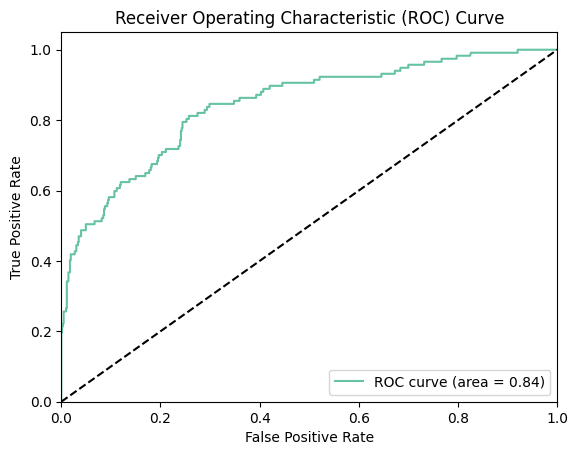

In [482]:
## Plot PR curve:

# Compute the predicted probabilities for the validation data
y_pred_prob7 = GB2.predict_proba(X_val2)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr_DecTree7, tpr_DecTree7, thresholds_DecTree7 = roc_curve(y_val2, y_pred_prob7)

# Compute the area under the ROC curve
roc_auc_DecTree7 = roc_auc_score(y_val2, y_pred_prob7)

# Plot the ROC curve
plt.plot(fpr_DecTree7, tpr_DecTree7, label='ROC curve (area = %0.2f)' % roc_auc_DecTree7)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

-------------------------------------------------------------------------------------------------------
#### Gradient Boost **(with the undersampled data seen in the beginning)**

In [483]:
## Data:
# train_under 
# test_under 

# Split predictor and target variables (keep in dataframe form)
X_train3 = train_under.drop(['Class'], axis = 1)
y_train3 = train_under['Class']

X_train3_new, X_val3, y_train3_new, y_val3 = train_test_split(X_train3, y_train3, test_size = 0.25, random_state = 314)    


In [484]:
X_train3

,Time,V1,V2,V3,V4,V5,V7,V8,V9,V10,V11,V12,V14,V15,V17,V18,V19,V20,V26,Amount
0,0.602157,1.161956,-0.068773,-1.590793,-0.479912,2.174889,-0.001805,0.646750,-0.357801,-0.137549,0.010785,0.113364,0.674724,0.959758,-0.896529,-0.180872,-0.053268,0.181766,-0.675068,1.394142
1,0.644571,-1.163968,-1.368834,1.842226,-1.061150,-0.064233,-0.513929,-0.305039,-2.292226,1.664462,1.836983,-0.276658,-0.934126,0.597039,1.040816,-0.867364,0.389845,-0.362818,-0.056767,0.076870
2,0.699421,0.954024,-0.174392,0.672818,1.393767,-0.322846,-0.162848,0.331490,0.442324,-0.129295,1.272427,1.569099,-0.003750,-1.068606,0.347580,-0.722259,-0.171647,-0.078693,-0.315756,0.871219
3,0.608226,1.222529,-1.746127,0.453627,-1.035764,0.947193,-0.280166,-0.934172,-2.681101,1.836305,-0.157578,-0.878794,0.304829,0.551899,0.569170,-0.023513,0.351400,-0.149948,-0.081849,-0.061790
4,0.418474,-1.143747,0.817163,1.203777,1.331515,1.702669,-1.227801,1.252450,0.061940,-1.447044,-1.335829,0.553519,-1.869137,-0.492490,0.749187,0.540499,0.336899,0.407046,-0.034743,-0.252448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,0.994440,2.039144,0.331717,-2.072626,0.292526,0.750169,0.346824,-0.346913,0.541437,-0.557925,-1.049086,0.124906,-0.992834,1.059812,0.022264,0.854327,-0.179946,-0.117443,-0.036478,0.111535
933,0.996591,2.169813,-0.045807,-2.079652,0.207907,0.722241,0.564011,-0.381757,0.403626,0.264935,-1.778153,-0.843704,0.839073,0.037256,-0.404518,-0.038491,0.420116,-0.286788,0.749486,-0.148626
935,0.996791,1.708900,-1.003900,-1.531147,-0.173086,-0.430068,-0.073634,-0.231775,-0.067886,0.501141,-1.559948,0.092857,0.051226,-0.474728,0.063361,1.073029,0.123317,-0.227253,-0.466157,3.716527
936,0.999808,-1.330035,1.912497,0.058653,4.098485,0.555525,-0.332319,1.016770,-1.751660,1.669879,-2.206718,-0.959271,0.769098,0.596934,0.246728,0.075046,1.193329,0.171426,0.080706,0.076870


              precision    recall  f1-score   support

           0       0.69      0.80      0.74       114
           1       0.71      0.58      0.64        95

    accuracy                           0.70       209
   macro avg       0.70      0.69      0.69       209
weighted avg       0.70      0.70      0.69       209

AUPRC: 0.7377315666789351


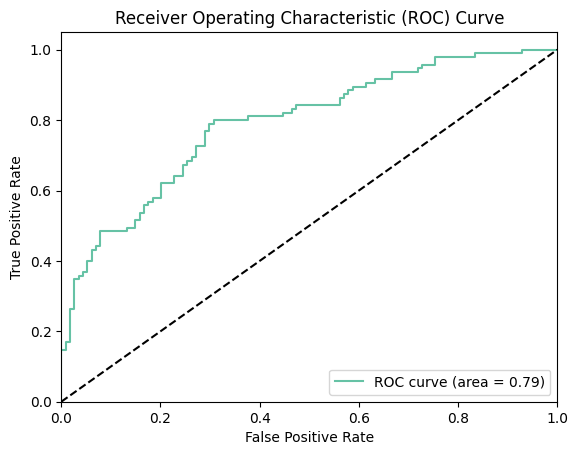

In [485]:
## Use same parameters here too

# Create the gradient boosting model with 100 estimators
GB3 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=314, loss='log_loss')

# Fit model to training set
GB3.fit(X_train3_new, y_train3_new)

# Evaluate the performance of the model on the validation set
y_pred_GB3 = GB3.predict(X_val3)
print(classification_report(y_val3, y_pred_GB3))


## AUPRC area under precision recall curve
## Calculate AUPRC

precision, recall, thresholds = precision_recall_curve(y_val3, y_pred_GB3)
auprc = auc(recall, precision)

print("AUPRC:", auprc)

## Plot PR curve:

# Compute the predicted probabilities for the validation data
y_pred_prob7_1 = GB3.predict_proba(X_val3)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr_DecTree7_1, tpr_DecTree7_1, thresholds_DecTree7_1 = roc_curve(y_val3, y_pred_prob7_1)

# Compute the area under the ROC curve
roc_auc_DecTree7_1 = roc_auc_score(y_val3, y_pred_prob7_1)

# Plot the ROC curve
plt.plot(fpr_DecTree7_1, tpr_DecTree7_1, label='ROC curve (area = %0.2f)' % roc_auc_DecTree7_1)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


#               precision    recall  f1-score   support

#            0       0.69      0.80      0.74       114
#            1       0.71      0.58      0.64        95

#     accuracy                           0.70       209
#    macro avg       0.70      0.69      0.69       209
# weighted avg       0.70      0.70      0.69       209


# AUPRC: 0.7377315666789351

-------------------------------------------------------------------------------------------------------

#### Linear SVM:

In [486]:
## Linear SVM with undersampling

# Create the linear SVM model
svm2 = LinearSVC(random_state=314)

# Fit model to training set
svm2.fit(X_train2_new, y_train2_new)

# Evaluate the performance of the model on the validation set
y_pred_svm2 = svm2.predict(X_val2)
print(classification_report(y_val2, y_pred_svm2))

## Output:
#               precision    recall  f1-score   support

#            0       0.90      0.98      0.94       626
#            1       0.79      0.38      0.52       117

#     accuracy                           0.89       743
#    macro avg       0.84      0.68      0.73       743
# weighted avg       0.88      0.89      0.87       743

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       626
           1       0.79      0.38      0.52       117

    accuracy                           0.89       743
   macro avg       0.84      0.68      0.73       743
weighted avg       0.88      0.89      0.87       743



C:\Users\Julia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [487]:
## AUPRC area under precision recall curve
## Calculate AUPRC
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y_val2, y_pred_svm2)
auprc = auc(recall, precision)

print("AUPRC:", auprc)

AUPRC: 0.6354967551397388


-------------------------------------------------------------------------------------------------------

# Final Model: **oversampling + gradient boosting**

We will now choose the second method (oversampling) and the model: Gradient Boosting to predict on the test set (to give us probabilities).

*Recall the the associated AUPRC was 0.89 which was the highest without overfitting (e.g. Random forest)*.

In [488]:
## Recall this was the fitted model:

##   # Train the gradient boosting model with 100 estimators
##   GB1 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=314, loss='deviance')
##   GB1.fit(X_train1_new, y_train1_new)

##   # Evaluate the performance of the model on the validation set
##   y_pred_GB1 = GB1.predict(X_val1)
##   print(classification_report(y_val1, y_pred_GB1))

In [489]:
## Suppose we predict the first 5 instances of X_val1:

# Predict the first 5 instances of X_val1
y_pred_first5 = GB1.predict(X_val1[:5])

# Print the predicted labels
print("Predicted labels for the first 5 instances of X_val1:")
print(y_pred_first5)

# If the output of the model are probabilities, you can use predict_proba instead of predict to get the probabilities
# Predict the probabilities for the first 5 instances of X_val1
y_prob_first5 = GB1.predict_proba(X_val1[:5])

# Print the predicted probabilities
print("\nPredicted probabilities for the first 5 instances of X_val1:")
print(y_prob_first5)

Predicted labels for the first 5 instances of X_val1:
[1 1 0 0 0]

Predicted probabilities for the first 5 instances of X_val1:
[[0.43012721 0.56987279]
 [0.12475322 0.87524678]
 [0.63511611 0.36488389]
 [0.67348352 0.32651648]
 [0.87276782 0.12723218]]


In [490]:
# Print the first 5 instances of X_val1
print("First 5 instances of X_val1:")
print(y_val1.iloc[:5])


First 5 instances of X_val1:
314447    1
260603    1
110057    0
76158     0
157791    0
Name: Class, dtype: int64


-------------------------------------------------------------------------------------------------------

#### Looks like it predicted all correctly. So, what about the predictions on the test set:

In [491]:
## Apply model to test set:

# Separate id and other features (since we did not train on the id column)
test_id = test['id']
test = test.drop('id', axis=1)

# Make predictions on the test set
Final_pred = GB1.predict_proba(test)

# Combine predictions with IDs
Final_pred_with_id = pd.DataFrame(data=Final_pred, columns=GB1.classes_)
Final_pred_with_id.insert(loc=0, column='id', value=test_id)
Final_pred_with_id
Final_pred_with_id.columns

# Trying to predict class 1 so drop column class 0:
To_submit_predictions = Final_pred_with_id.drop(0, axis=1)

# And rename 1 to Class to submit to kaggle:
To_submit_predictions = To_submit_predictions.rename(columns={1: 'Class'})

# Lastly convert to .csv file:
To_submit_predictions.to_csv('submit_predictions.csv', index=False)

In [492]:
To_submit_predictions

,id,Class
0,219129,0.211627
1,219130,0.044237
2,219131,0.027750
3,219132,0.185187
4,219133,0.081592
...,...,...
146082,365211,0.138215
146083,365212,0.140642
146084,365213,0.331120
146085,365214,0.462567


**Kaggle submission:**
> Private score: 0.74554

> Public score: 0.80055


-------------------------------------------------------------------------------------------------------

## Test other models: AdaBoost and RV for case of oversampling

-------------------------------------------------------------------------------------------------------

### AdaBoost with oversampling

In [493]:
## Apply model to test set:

# Make predictions on the test set
Final_pred2 = AdaBoost1.predict_proba(test)

# Combine predictions with IDs
Final_pred2_with_id = pd.DataFrame(data=Final_pred2, columns=AdaBoost1.classes_)
Final_pred2_with_id.insert(loc=0, column='id', value=test_id)
Final_pred2_with_id
Final_pred2_with_id.columns

# Trying to predict class 1 so drop column class 0:
To_submit_predictions2 = Final_pred2_with_id.drop(0, axis=1)

# And rename 1 to Class to submit to kaggle:
To_submit_predictions2 = To_submit_predictions2.rename(columns={1: 'Class'})

# Lastly convert to .csv file:
To_submit_predictions2.to_csv('submit_predictions2.csv', index=False)

In [494]:
To_submit_predictions2

,id,Class
0,219129,0.489305
1,219130,0.484893
2,219131,0.474316
3,219132,0.491324
4,219133,0.483822
...,...,...
146082,365211,0.476863
146083,365212,0.485533
146084,365213,0.491003
146085,365214,0.516009


**Kaggle submission:**
>Private score: ~ 0.71 

>Public score: ~ 0.78

-------------------------------------------------------------------------------------------------------

### Random forest with oversampling

In [495]:
## Apply model to test set:

# Make predictions on the test set
Final_pred3 = RF1.predict_proba(test)

# Combine predictions with IDs
Final_pred3_with_id = pd.DataFrame(data=Final_pred3, columns=RF1.classes_)
Final_pred3_with_id.insert(loc=0, column='id', value=test_id)
Final_pred3_with_id
Final_pred3_with_id.columns

# Trying to predict class 1 so drop column class 0:
To_submit_predictions3 = Final_pred3_with_id.drop(0, axis=1)

# And rename 1 to Class to submit to kaggle:
To_submit_predictions3 = To_submit_predictions3.rename(columns={1: 'Class'})

# Lastly convert to .csv file:
To_submit_predictions3.to_csv('submit_predictions3.csv', index=False)

In [496]:
To_submit_predictions3

,id,Class
0,219129,0.02
1,219130,0.02
2,219131,0.00
3,219132,0.02
4,219133,0.03
...,...,...
146082,365211,0.02
146083,365212,0.00
146084,365213,0.06
146085,365214,0.35


**Kaggle submission:**
>Private score: ~ 0.75

>Public score: ~ 0.75